# **Import Libraries**

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px
class colorss:
    yellows=['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404','#a70000','#ff5252','#ff7b7b','#ffbaba']
    greens=['#ffffd4','#fee391','#fec44f','#fe9929','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#005a32']
cmaps=['flare','icefire','bwr_r','Accent','Spectral','RdGy','afmhot_r','afmhot','inferno','seismic','vlag','vlag_r']

# **Read Dataset**

In [6]:
df=pd.read_csv("/content/yield_df.csv")


In [7]:
df


Unnamed: 0     Area         Item    Year  hg/ha_yield  \
0               0  Albania        Maize  1990.0      36613.0   
1               1  Albania     Potatoes  1990.0      66667.0   
2               2  Albania  Rice, paddy  1990.0      23333.0   
3               3  Albania      Sorghum  1990.0      12500.0   
4               4  Albania     Soybeans  1990.0       7000.0   
...           ...      ...          ...     ...          ...   
18994       18994   Mexico     Potatoes  1990.0     158256.0   
18995       18995   Mexico     Potatoes  1990.0     158256.0   
18996       18996   Mexico     Potatoes  1990.0     158256.0   
18997       18997   Mexico     Potatoes  1990.0     158256.0   
18998       18998      Mex          NaN     NaN          NaN   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0             121.00     16.37  
4                             1485.0             121.00     16.37  
...                              ...                ...       ...  
18994                          758.0           34468.93     19.63  
18995                          758.0           34468.93     22.63  
18996                          758.0           34468.93     19.27  
18997                          758.0           34468.93     16.69  
18998                            NaN                NaN       NaN  

[18999 rows x 8 columns]

## 📊 Dataset Description

| Variable                     | Description                                                                 |
|------------------------------|-----------------------------------------------------------------------------|
| Area                         | Country names that plant crops                                              |
| Item                         | Types of crops planted                                                      |
| Year                         | Time of planted crops (1990–2013)                                           |
| average_rain_fall_mm_per_year| Average rainfall per year (mm)                                              |
| pesticides_tonnes            | Pesticides used (tonnes)                                                    |
| avg_temp                     | Average temperature (°C)                                                    |
| hg/ha_yield                  | Crop yield production (hectogram per hectare, Hg/Ha)                        |


# **Dataset Overview**

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18999 entries, 0 to 18998
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     18999 non-null  int64  
 1   Area                           18999 non-null  object 
 2   Item                           18998 non-null  object 
 3   Year                           18998 non-null  float64
 4   hg/ha_yield                    18998 non-null  float64
 5   average_rain_fall_mm_per_year  18998 non-null  float64
 6   pesticides_tonnes              18998 non-null  float64
 7   avg_temp                       18998 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.2+ MB


## 📊 Dataset Inferences

- **Number of Entries:** 28,242 (index 0 → 28,241)  
- **Number of Columns:** 8  

### Data Types
| Column        | Data Type  |
|---------------|------------|
| Area          | object     |
| Item          | object     |
| Year          | int64      |
| average_rain_fall_mm_per_year | float64 |
| pesticides_tonnes | float64 |
| avg_temp      | float64    |
| hg/ha_yield   | float64    |

### Missing Values
- No missing values detected.  
- Each column has **28,242 non-null entries**.  


# **Summary Statistics for Numerical Variables**

In [9]:
df.describe().T


count          mean           std      min  \
Unnamed: 0                     18999.0   9499.000000   5484.683218     0.00   
Year                           18998.0   2001.513054      7.051642  1990.00   
hg/ha_yield                    18998.0  77491.558743  84031.519451   578.00   
average_rain_fall_mm_per_year  18998.0   1291.415044    727.115956    51.00   
pesticides_tonnes              18998.0  46429.869225  70077.877049     0.04   
avg_temp                       18998.0     20.967609      6.535950     1.61   

                                      25%        50%        75%        max  
Unnamed: 0                      4749.5000   9499.000   14248.50   18998.00  
Year                            1995.0000   2001.000    2008.00    2013.00  
hg/ha_yield                    19780.0000  38613.000  104452.00  501412.00  
average_rain_fall_mm_per_year    700.0000   1083.000    1761.00    3240.00  
pesticides_tonnes               1740.1775  28707.010   61164.07  367778.00  
avg_temp                          17.1300     23.765      26.33      29.41

## 📈 Numerical Features (Summary Statistics)

- **average_rain_fall_mm_per_year**:  
  - Mean: ~1149 mm  
  - Range: 51 mm → 3240 mm  
  - Indicates significant variability in rainfall across countries and years.  

- **pesticides_tonnes**:  
  - Mean: ~37,077 tonnes  
  - Range: 0.04 tonnes → 367,778 tonnes  
  - Highlights stark differences in pesticide usage, from minimal reliance to extremely high dependence.  

- **hg/ha_yield (Crop Yield)**:  
  - Mean: ~77,053 hg/ha  
  - Range: 50 hg/ha → 501,412 hg/ha  
  - Suggests large disparities in agricultural productivity across crops and regions.  


# **Summary Statistics for Categorical Variables**

In [10]:
df.describe(include='object')


Area      Item
count   18999     18998
unique     64        10
top     India  Potatoes
freq     4048      2769

## 📊 Categorical Features (Object Data Types)

- **Area (Countries/Regions):**  
  - Total unique values: **101**  
  - Most frequent: **India** (4,048 entries out of 28,242)  
  - Suggests strong representation from diverse regions, with India having the largest share of data.  

- **Item (Crops):**  
  - Total unique values: **10**  
  - Most frequent: **Potatoes** (4,276 entries)  
  - Dataset covers a variety of staple crops, but potatoes dominate in frequency.  


# **EDA**

In [11]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df

Area         Item    Year  hg/ha_yield  \
0      Albania        Maize  1990.0      36613.0   
1      Albania     Potatoes  1990.0      66667.0   
2      Albania  Rice, paddy  1990.0      23333.0   
3      Albania      Sorghum  1990.0      12500.0   
4      Albania     Soybeans  1990.0       7000.0   
...        ...          ...     ...          ...   
18994   Mexico     Potatoes  1990.0     158256.0   
18995   Mexico     Potatoes  1990.0     158256.0   
18996   Mexico     Potatoes  1990.0     158256.0   
18997   Mexico     Potatoes  1990.0     158256.0   
18998      Mex          NaN     NaN          NaN   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0             121.00     16.37  
4                             1485.0             121.00     16.37  
...                              ...                ...       ...  
18994                          758.0           34468.93     19.63  
18995                          758.0           34468.93     22.63  
18996                          758.0           34468.93     19.27  
18997                          758.0           34468.93     16.69  
18998                            NaN                NaN       NaN  

[18999 rows x 7 columns]

In [12]:
# remove countries with less than 100 record
country_counts =df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df_filtered = df[~df['Area'].isin(countries_to_drop)]
df = df_filtered.reset_index(drop=True)

In [13]:
df


Area            Item    Year  hg/ha_yield  \
0        Algeria           Maize  1990.0      16500.0   
1        Algeria        Potatoes  1990.0      78936.0   
2        Algeria     Rice, paddy  1990.0      28000.0   
3        Algeria         Sorghum  1990.0      16571.0   
4        Algeria           Wheat  1990.0       6315.0   
...          ...             ...     ...          ...   
17804  Mauritius         Cassava  2013.0     137027.0   
17805  Mauritius           Maize  2013.0      67957.0   
17806  Mauritius        Potatoes  2013.0     236026.0   
17807  Mauritius     Rice, paddy  2013.0      21250.0   
17808  Mauritius  Sweet potatoes  2013.0     133049.0   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                               89.0            1828.92     17.48  
1                               89.0            1828.92     17.48  
2                               89.0            1828.92     17.48  
3                               89.0            1828.92     17.48  
4                               89.0            1828.92     17.48  
...                              ...                ...       ...  
17804                         2041.0             671.77     24.31  
17805                         2041.0             671.77     24.31  
17806                         2041.0             671.77     24.31  
17807                         2041.0             671.77     24.31  
17808                         2041.0             671.77     24.31  

[17809 rows x 7 columns]

In [14]:
datacorr=df.copy()


In [15]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

<Axes: >

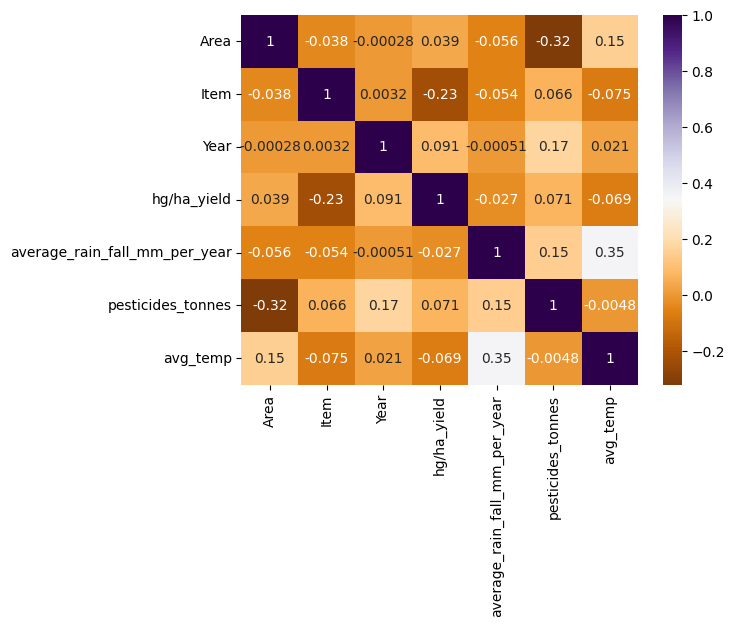

In [16]:
sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')

## 📊 Inferences from Categorical Features

- **Area (Country/Region):**
  - Shows a strong correlation with **pesticides_tonnes** → certain regions use pesticides more intensively than others.
  - Also correlates with **average_rain_fall_mm_per_year**, reflecting the climatic diversity across countries.
  - Interpretation: Regional agricultural practices and climates strongly influence input use and water availability.

- **Item (Crop Type):**
  - Strongly correlated with **hg/ha_yield** (crop yield).
  - Certain crops (e.g., rice, maize, potatoes) are consistently higher-yielding compared to others.
  - Interpretation: Crop type is a dominant determinant of productivity, more than chemical inputs alone.


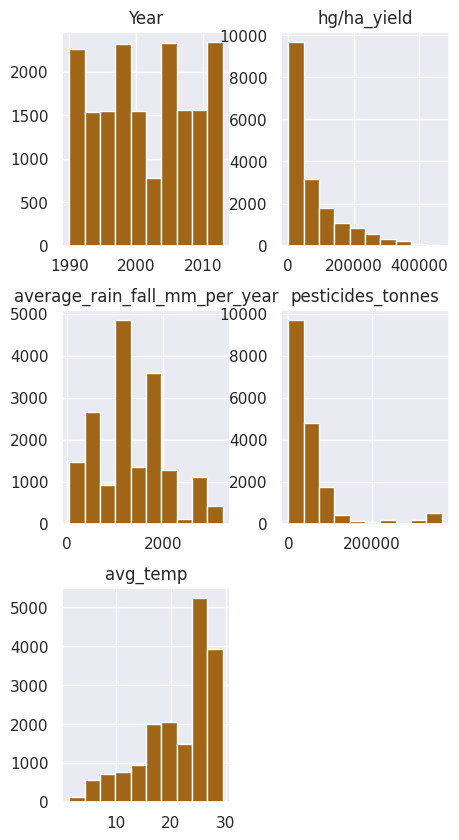

In [17]:
sns.set(palette='BrBG')
df.hist(figsize=(5,10));

## 📈 Distribution Inferences

- **Rainfall (average_rain_fall_mm_per_year):**
  - Most values are concentrated between **0–1000 mm**.
  - Very few regions experience extreme rainfall around **3000 mm**.
  - Suggests that drought-prone and moderately rainy regions dominate the dataset.

- **Pesticides (pesticides_tonnes):**
  - Majority of entries report **little to zero pesticide use**.
  - Indicates that many regions rely minimally on chemical inputs, while only a few employ extremely high usage.

- **Temperature (avg_temp):**
  - Most average temperatures cluster around **25°C**.
  - Reflects the predominance of warm and tropical agricultural zones.

- **Crop Yield (hg/ha_yield):**
  - A vast majority of entries show yields close to **0**.
  - Suggests data imbalance: many records correspond to low-productivity regions, while high yields are less frequent.


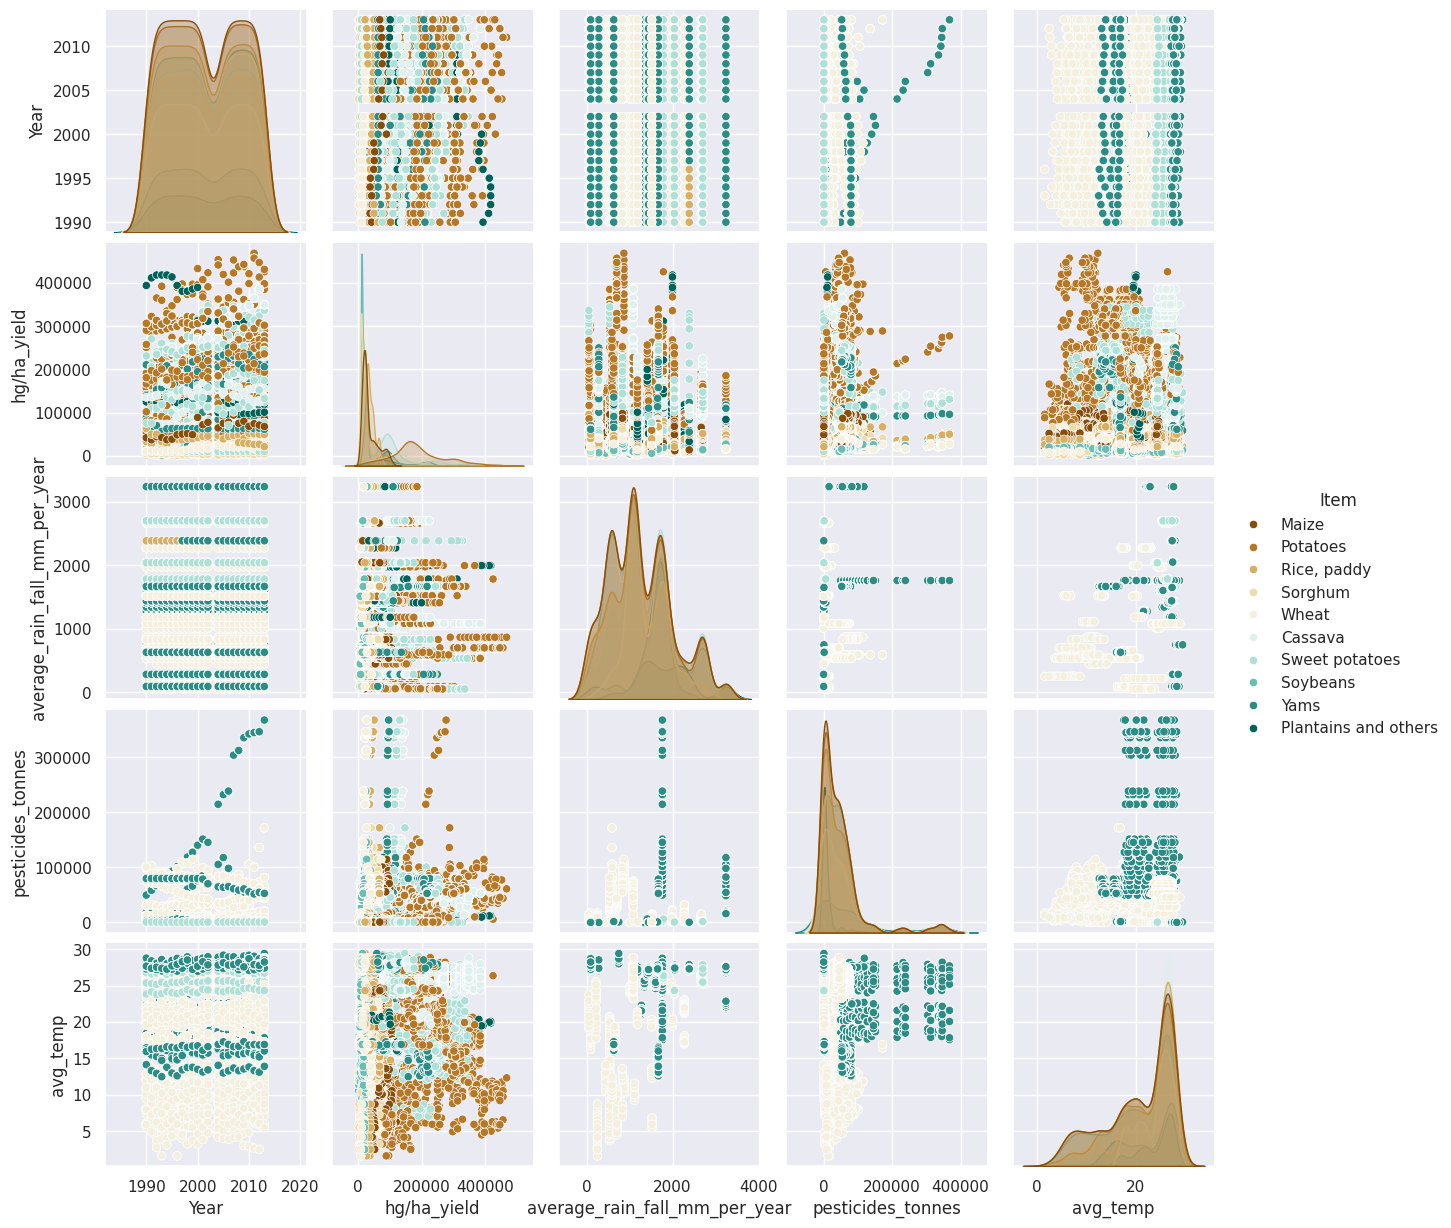

In [18]:
sns.pairplot(data=df,hue='Item',kind='scatter',palette='BrBG')


<Axes: xlabel='Year'>

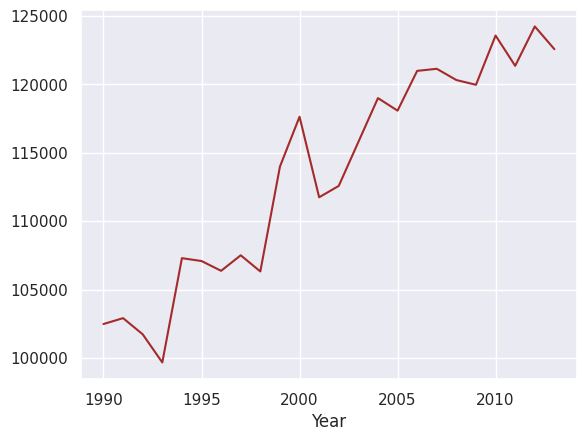

In [19]:
df2=df[df['Item']=='Yams']
df2.groupby('Year')['hg/ha_yield'].mean().plot(color='brown')

## 🌱 Crop-Specific & Temporal Inferences

- **Yams:**
  - Use **high amounts of pesticides** compared to other crops.  
  - Grown across all rainfall ranges, showing adaptability but also high input-dependency.  

- **Wheat:**
  - Thrives across **all average temperature ranges**.  
  - Can grow in **average-to-low rainfall regions**, reflecting its drought tolerance.  

- **Temporal Trend (2003–2013):**
  - Notable increase in **pesticide use on yams** from 2003 onwards.  
  - Suggests efforts to boost yam productivity through chemical inputs rather than ecological approaches.  

- **Crop Yield (hg/ha_yield):**
  - **Sorghum and Soybeans** → consistently lowest yield production.  
  - **Potatoes** → highest frequency and productivity, making them the most dominant crop in the dataset.  


In [20]:
geojson_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
data = gpd.read_file(geojson_url)

merged_data = data.merge(df, left_on='NAME', right_on='Area', how='left')

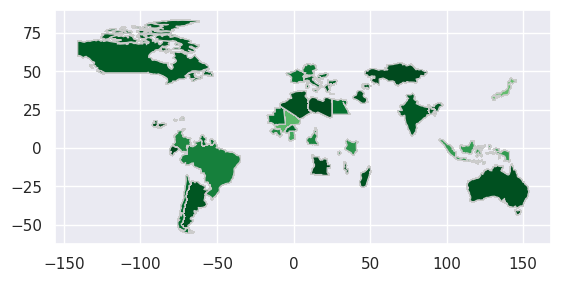

In [21]:
# fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot( column='hg/ha_yield', cmap='Greens_r', linewidth=0.8, edgecolor='0.8')
# plt.title("Countries")
plt.show()

In [22]:
del merged_data


In [23]:
del data


In [24]:
# import plotly.io as pio
# pio.renderers.default = 'notebook'

ValueError: Invalid RGBA argument: np.float64(0.12156862745098039)

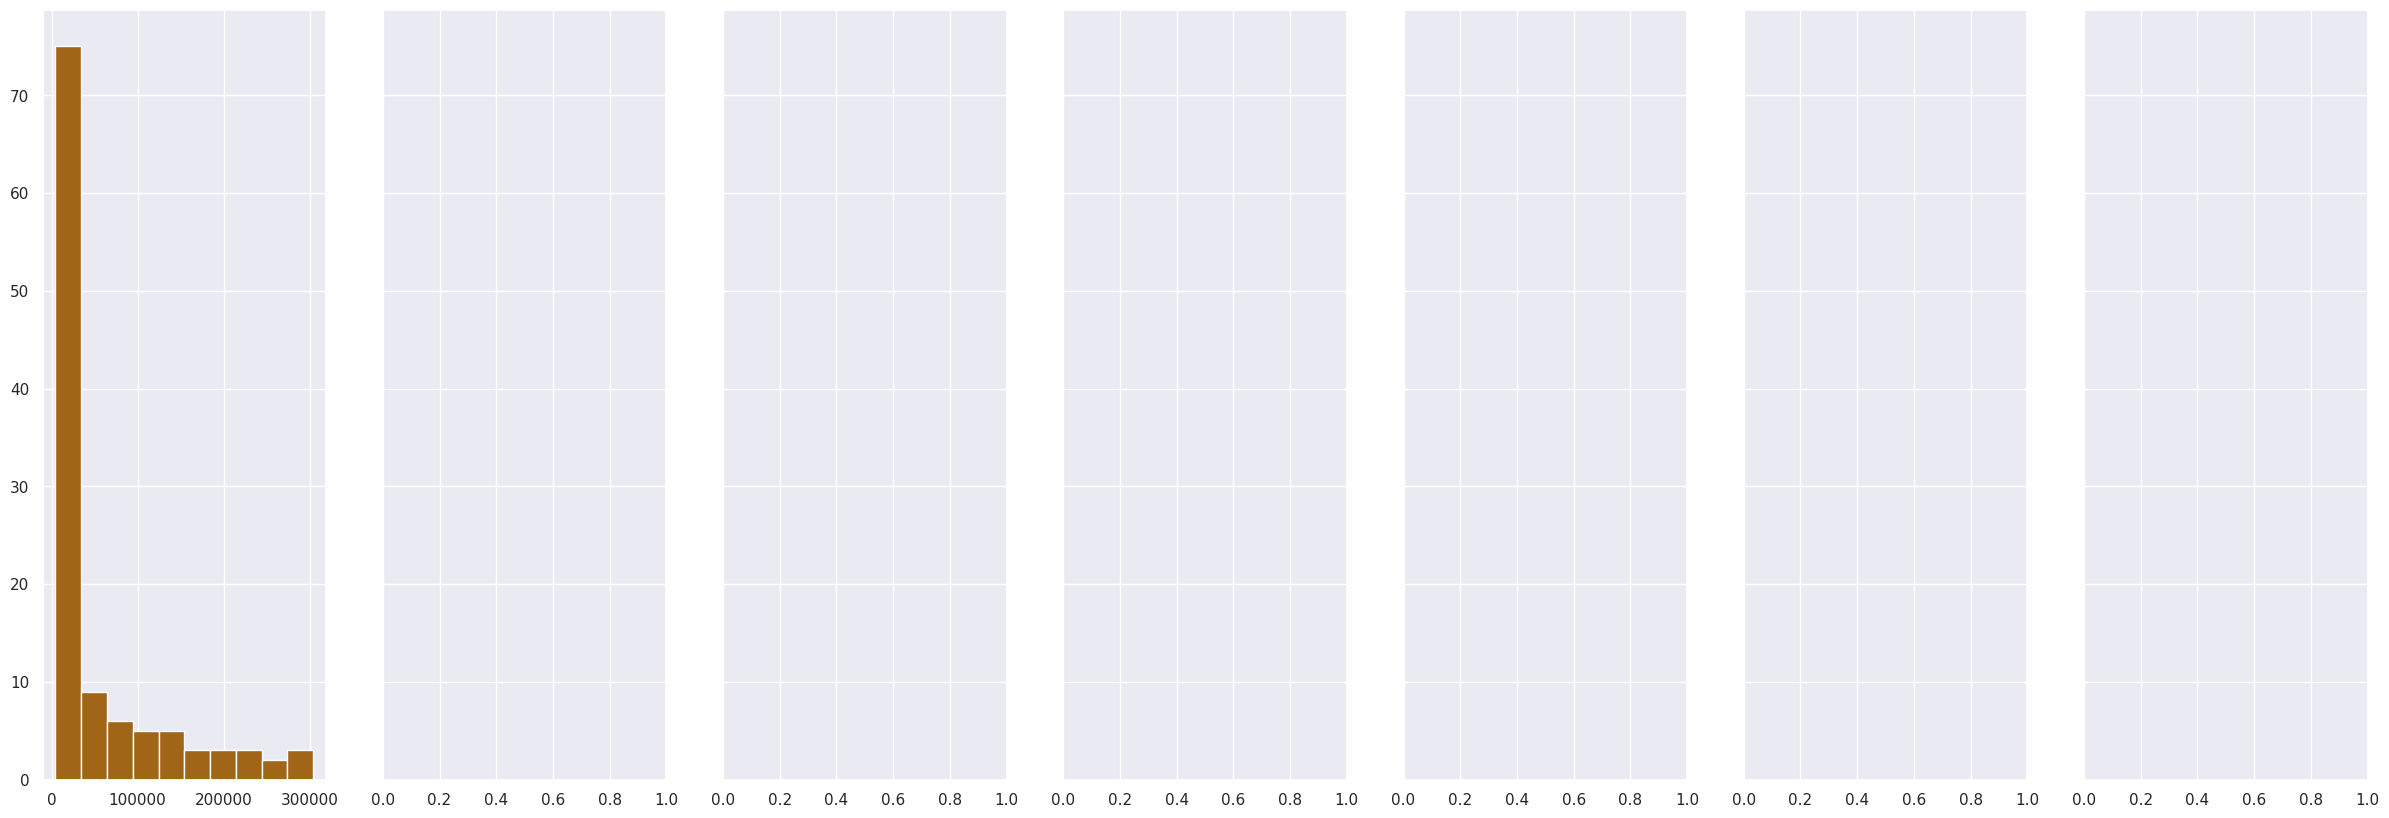

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Discrete color palette (21 distinct colors)
palette = sns.color_palette('tab20', 21)

num_plots = 7
areas_per_plot = 10

# Get unique areas and split into chunks
unique_areas = sorted(df['Area'].unique())
area_chunks = [unique_areas[i:i+areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]

# Adjust last chunk if needed
if len(area_chunks) > 1:
    area_chunks[-2] = unique_areas[-11:]

# Create subplots
fig, axs = plt.subplots(ncols=num_plots, figsize=(30, 10), sharey=True)

# Loop over each subplot
for plot_idx, ax in enumerate(axs):
    plot_df = df[df['Area'].isin(area_chunks[plot_idx])]

    for idx, area in enumerate(plot_df['Area'].unique()):
        data = plot_df[plot_df['Area'] == area]
        ax.hist(
            data['hg/ha_yield'],
            facecolor=palette[idx % len(palette)],  # ensures valid RGB tuple
            alpha=0.7,
            label=area
        )

    ax.set_title(f"Countries {plot_idx+1}")
    ax.set_xlabel("Yield (hg/ha)")
    ax.set_ylabel("Frequency")
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()


In [28]:
for i in range(len(area_chunks)):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    dk = plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg = dk.sort_values(by=['hg/ha_yield'], ascending=True)
    display(dg.head())


hg/ha_yield
Area       Item                 
Angola     Sorghum   2926.769231
Azerbaijan Sorghum   3324.166667
Angola     Soybeans  4235.538462
           Maize     5753.869565
Azerbaijan Soybeans  7599.850000

hg/ha_yield
Area                     Item                  
Ecuador                  Wheat      7111.956522
Cameroon                 Soybeans   7566.782609
Central African Republic Sorghum    9353.913043
                         Maize     10250.869565
Cameroon                 Sorghum   11521.304348

hg/ha_yield
Area     Item                 
Honduras Wheat     5574.130435
Haiti    Maize     7905.565217
         Sorghum   8157.913043
Ghana    Sorghum  10291.347826
Honduras Sorghum  10863.782609

hg/ha_yield
Area       Item                 
Mauritania Sorghum   4673.869565
Madagascar Soybeans  6267.173913
Malawi     Sorghum   6403.086957
Madagascar Sorghum   6452.304348
Mauritania Maize     7483.869565

hg/ha_yield
Area       Item                 
Mauritania Sorghum   4673.869565
Malawi     Sorghum   6403.086957
Mauritania Maize     7483.869565
Malawi     Soybeans  8733.900000
Mali       Sorghum   9157.130435

In [29]:
for i in range(len(area_chunks)):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    dk = plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg = dk.sort_values(by=['hg/ha_yield'], ascending=True)

    print(f"\n=== Chunk {i+1} Lowest Yields ===")
    display(dg.head())

    print(f"=== Chunk {i+1} Highest Yields ===")
    display(dg.tail())



=== Chunk 1 Lowest Yields ===


hg/ha_yield
Area       Item                 
Angola     Sorghum   2926.769231
Azerbaijan Sorghum   3324.166667
Angola     Soybeans  4235.538462
           Maize     5753.869565
Azerbaijan Soybeans  7599.850000

=== Chunk 1 Highest Yields ===


hg/ha_yield
Area      Item                         
Algeria   Potatoes        182413.956522
Brazil    Potatoes        196056.000000
Australia Sweet potatoes  257610.826087
Argentina Potatoes        262059.173913
Australia Potatoes        330944.826087


=== Chunk 2 Lowest Yields ===


hg/ha_yield
Area                     Item                  
Ecuador                  Wheat      7111.956522
Cameroon                 Soybeans   7566.782609
Central African Republic Sorghum    9353.913043
                         Maize     10250.869565
Cameroon                 Sorghum   11521.304348

=== Chunk 2 Highest Yields ===


hg/ha_yield
Area        Item                               
Chile       Potatoes              184835.260870
El Salvador Plantains and others  198605.217391
            Potatoes              211362.304348
Egypt       Potatoes              235444.956522
            Sweet potatoes        261369.347826


=== Chunk 3 Lowest Yields ===


hg/ha_yield
Area     Item                 
Honduras Wheat     5574.130435
Haiti    Maize     7905.565217
         Sorghum   8157.913043
Ghana    Sorghum  10291.347826
Honduras Sorghum  10863.782609

=== Chunk 3 Highest Yields ===


hg/ha_yield
Area      Item                               
Hungary   Potatoes              210372.782609
Guatemala Potatoes              241157.869565
          Plantains and others  291096.304348
Germany   Potatoes              386553.347826
France    Potatoes              395037.260870


=== Chunk 4 Lowest Yields ===


hg/ha_yield
Area       Item                 
Mauritania Sorghum   4673.869565
Madagascar Soybeans  6267.173913
Malawi     Sorghum   6403.086957
Madagascar Sorghum   6452.304348
Mauritania Maize     7483.869565

=== Chunk 4 Highest Yields ===


hg/ha_yield
Area      Item                         
Japan     Yams            211343.434783
Mauritius Potatoes        211356.869565
Japan     Sweet potatoes  237639.391304
Italy     Potatoes        237861.347826
Japan     Potatoes        311005.260870


=== Chunk 5 Lowest Yields ===


hg/ha_yield
Area       Item                 
Mauritania Sorghum   4673.869565
Malawi     Sorghum   6403.086957
Mauritania Maize     7483.869565
Malawi     Soybeans  8733.900000
Mali       Sorghum   9157.130435

=== Chunk 5 Highest Yields ===


hg/ha_yield
Area      Item                   
Malawi    Potatoes  121361.217391
Mali      Yams      133591.869565
Mauritius Cassava   144216.956522
Mali      Potatoes  195653.869565
Mauritius Potatoes  211356.869565

In [30]:
dk=df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
dk.sort_values(by=['hg/ha_yield'],ascending=False)

hg/ha_yield
Area       Item                               
France     Potatoes              395037.260870
Germany    Potatoes              386553.347826
Australia  Potatoes              330944.826087
Japan      Potatoes              311005.260870
Guatemala  Plantains and others  291096.304348
...                                        ...
Honduras   Wheat                   5574.130435
Mauritania Sorghum                 4673.869565
Angola     Soybeans                4235.538462
Azerbaijan Sorghum                 3324.166667
Angola     Sorghum                 2926.769231

[312 rows x 1 columns]

# 📊 Crop Yield Inferences (Grouped Analysis)

### Group 0
- **Highest yield:** Australia (Potatoes)  
- **Lowest yield:** Angola (Sorghum, Soybeans, Maize)  

### Group 1
- **Highest yield:** Egypt (Sweet Potatoes, Potatoes)  
- **Lowest yield:** Ecuador (Wheat)  

### Group 2
- **Highest yield:** France and Germany (Potatoes)  
- **Lowest yield:** Honduras (Wheat)  

### Group 3
- **Highest yield:** India (Cassava), Japan (Potatoes)  
- **Lowest yield:** Madagascar (Soybeans, Sorghum)  

### Group 4
- **Highest yield:** Morocco and Mexico (Potatoes)  
- **Lowest yield:** Niger (Wheat)  

### Group 5
- **Highest yield:** South Africa, Spain, Saudi Arabia (Potatoes)  
- **Lowest yield:** Pakistan (Sorghum)  

### Group 6
- **Highest yield:** United Kingdom and Turkey (Potatoes)  
- **Lowest yield:** Tajikistan (Soybeans)  

---

# 🌱 Consolidated Insights
- **Top Producing Countries:** United Kingdom, France, Germany, Australia, Japan  
- **Most Productive Crop:** Potatoes  
- **Least Producing Countries:** Zimbabwe, Azerbaijan, Angola, Niger, Tajikistan  
- **Least Productive Crops:** Sorghum and Soybeans  

---

# 🔬 Scientific Interpretation
- Potatoes dominate as a **globally high-yield crop**, especially in developed agricultural systems.  
- Sorghum and Soybeans consistently underperform, reflecting challenges in **resource-limited regions** or crop-specific biological limits.  
- Regional differences show how **climate, crop choice, and input strategies** influence productivity.  
- These findings support the project’s central claim: **environmental and biological factors outweigh chemical inputs in determining crop yields**.  


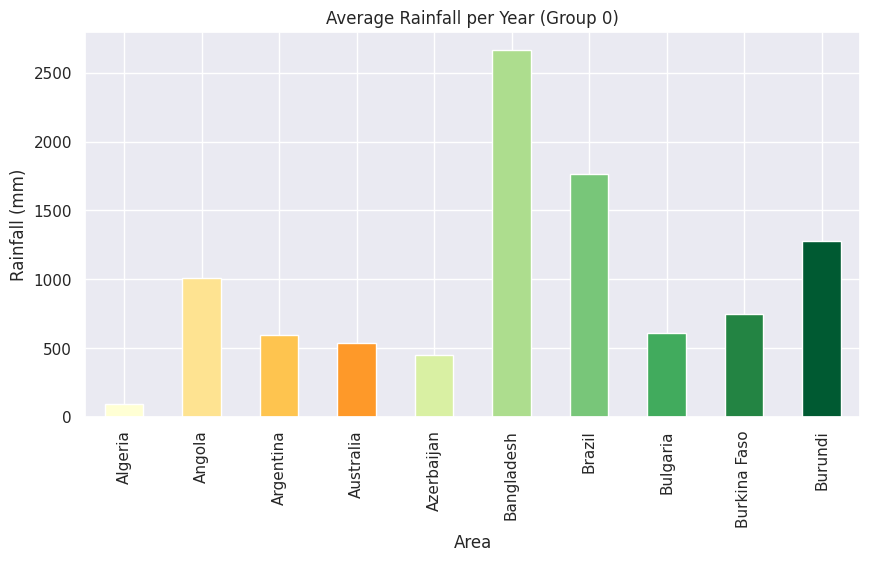

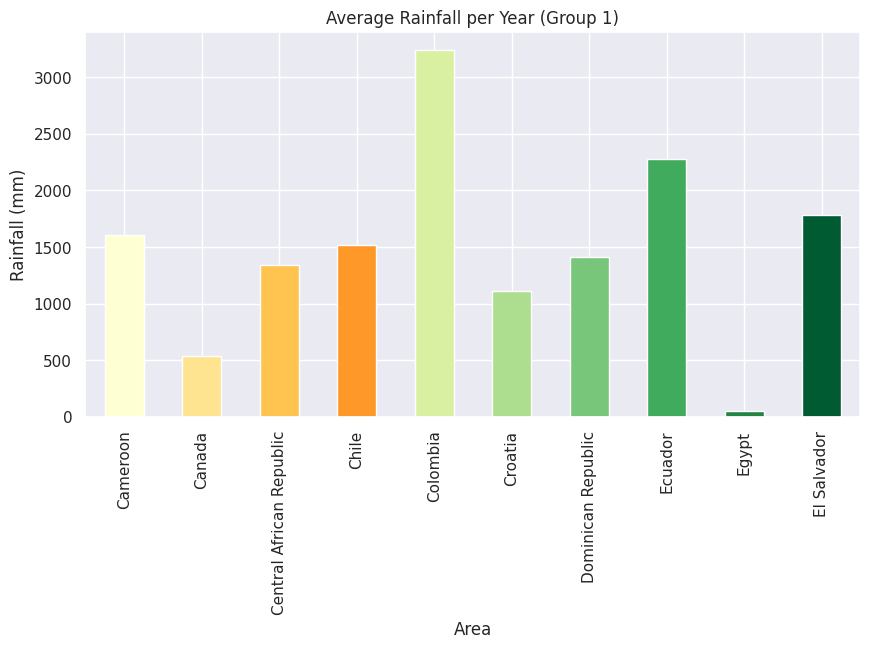

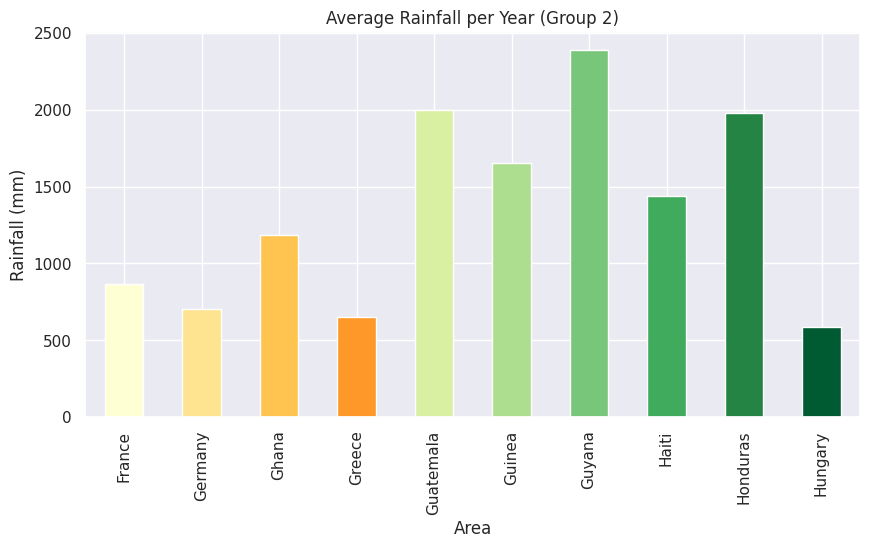

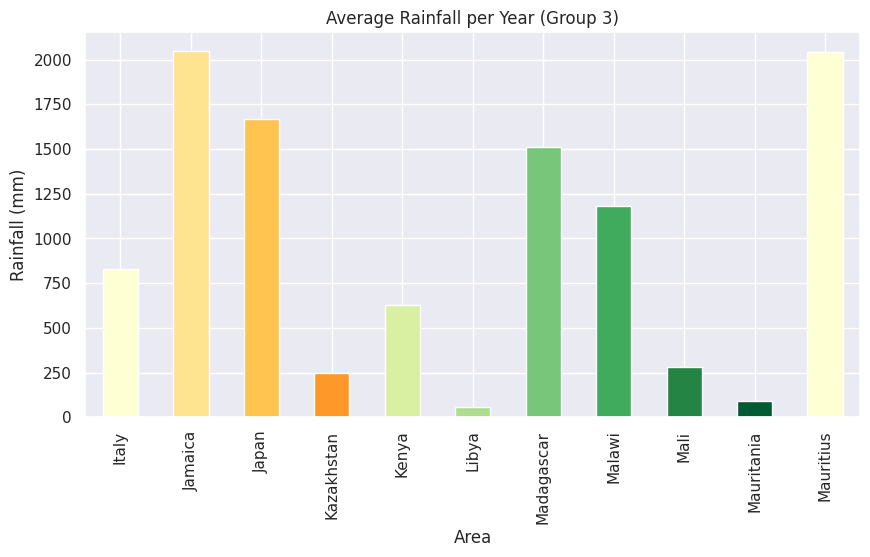

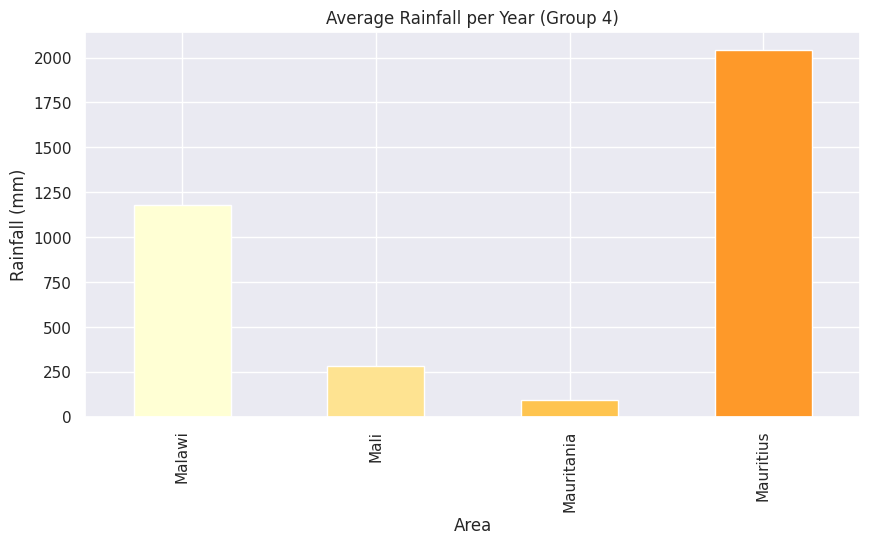

In [31]:
for i in range(len(area_chunks)):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['average_rain_fall_mm_per_year'].mean().plot(
        kind='bar',
        color=colorss.greens,
        figsize=(10,5)
    )
    plt.xticks(rotation=90)
    plt.title(f"Average Rainfall per Year (Group {i})")
    plt.ylabel("Rainfall (mm)")
    plt.show()


# 🌧️ Rainfall Inferences

- **Top Rainfall Countries (>2000 mm):**  
  Bangladesh, Colombia, Guyana, Indonesia, Nicaragua, Papua New Guinea, Ecuador, Suriname  

- **Lowest Rainfall Countries (<500 mm):**  
  Saudi Arabia, Pakistan, South Africa, Mali, Mauritania, Morocco, Niger, Libya, Iraq, Egypt, Azerbaijan, Algeria  

---

## 🔬 Interpretation
- Countries with **>2000 mm rainfall** represent tropical and equatorial regions, where excessive rainfall can lead to flooding risks but also supports water-intensive crops such as rice and bananas.  
- Countries with **<500 mm rainfall** are concentrated in arid and semi-arid zones, where **drought stress and water scarcity** make agriculture highly vulnerable.  
- This contrast highlights the need for **climate-adapted crop strategies** — flood-resistant crops in tropical regions and drought-tolerant varieties in arid zones.  


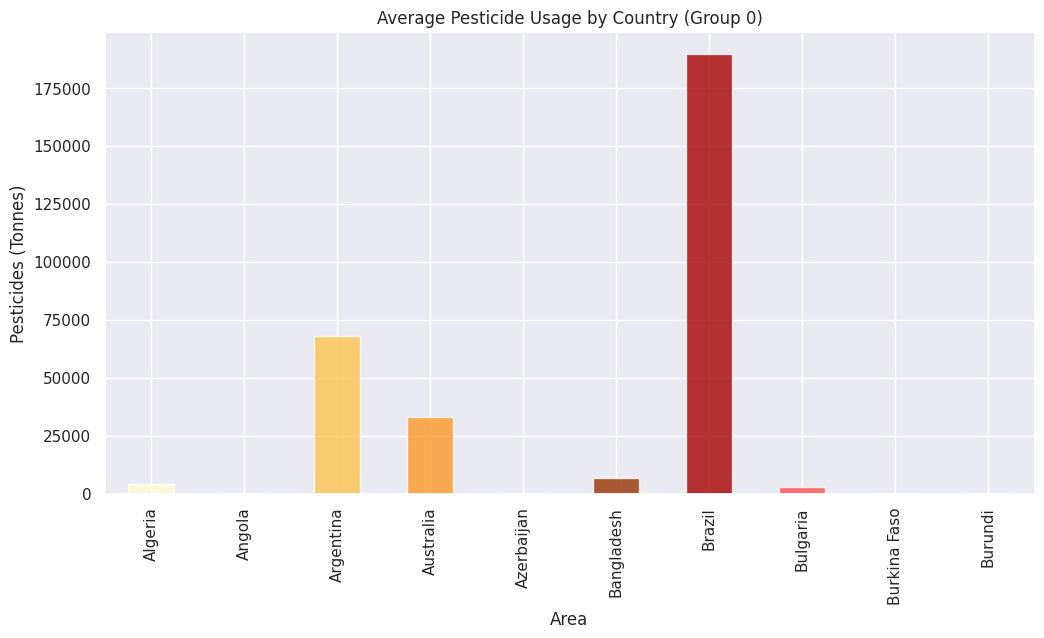

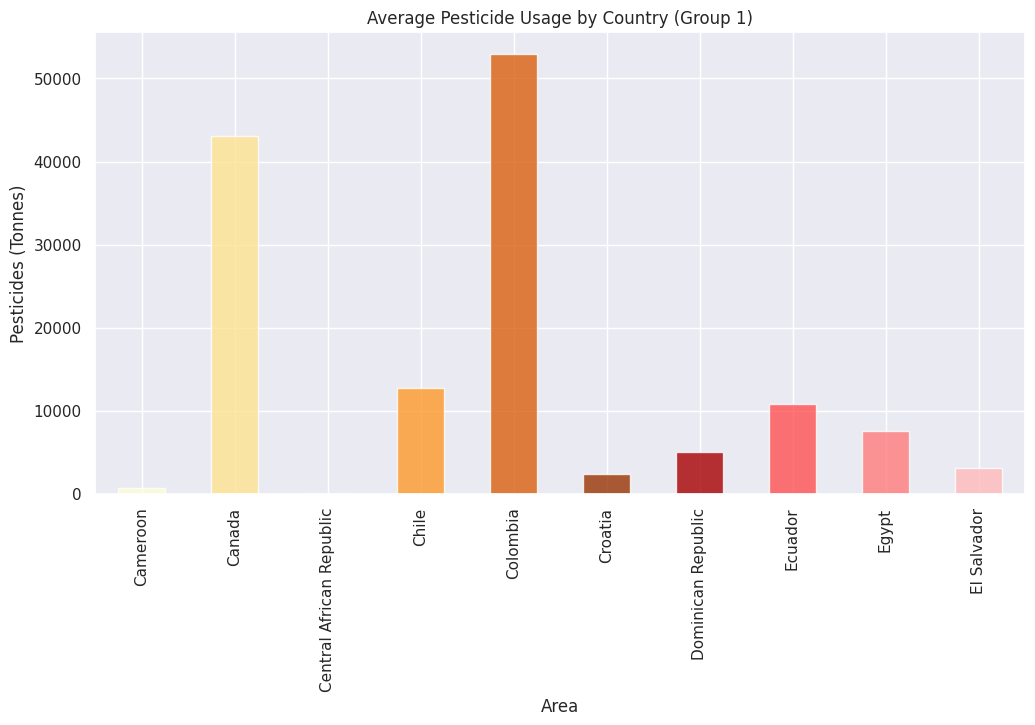

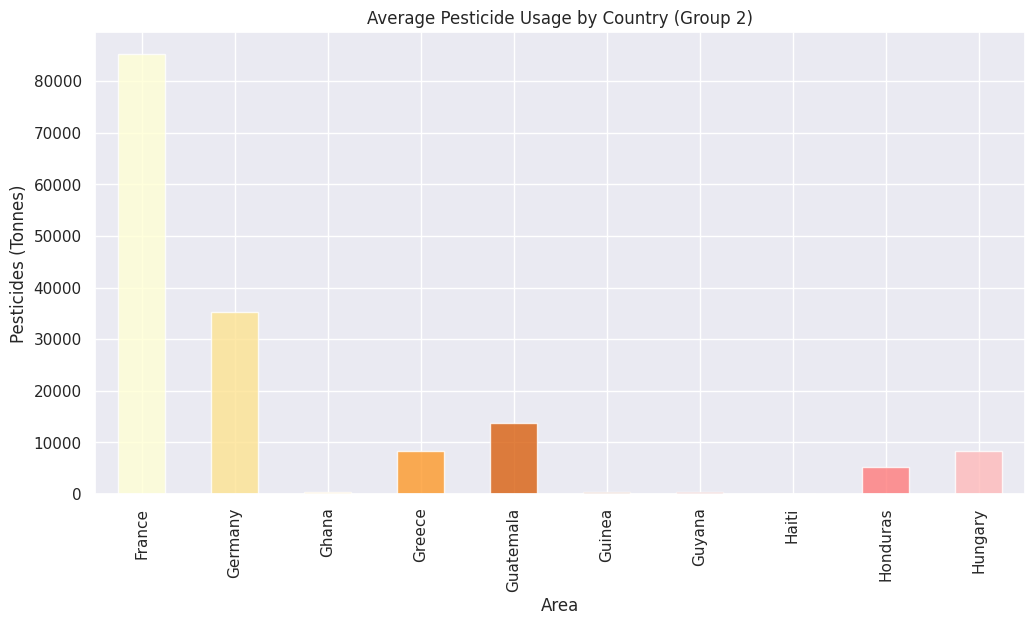

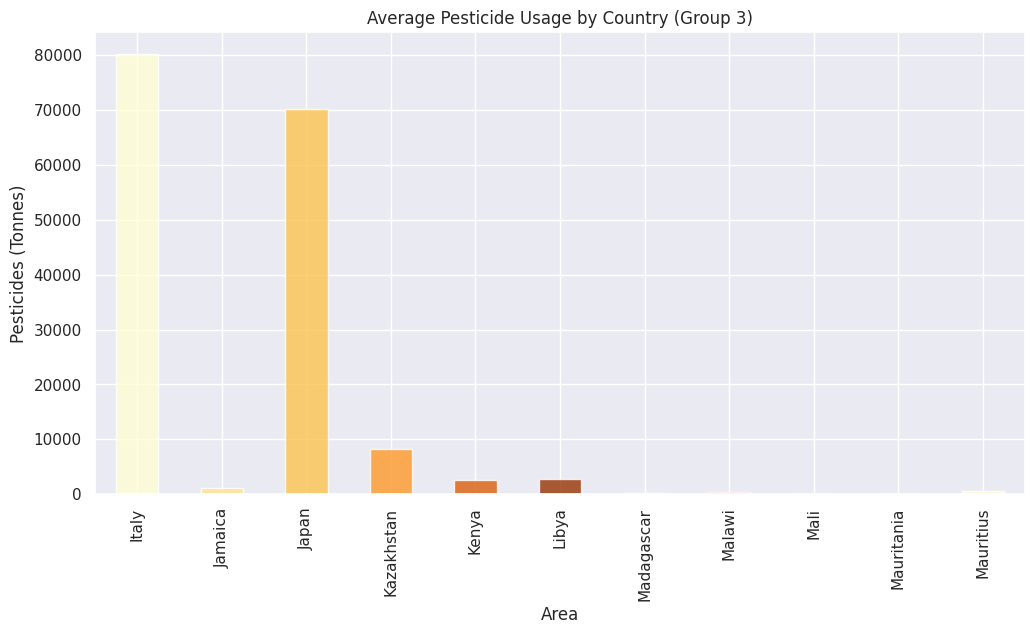

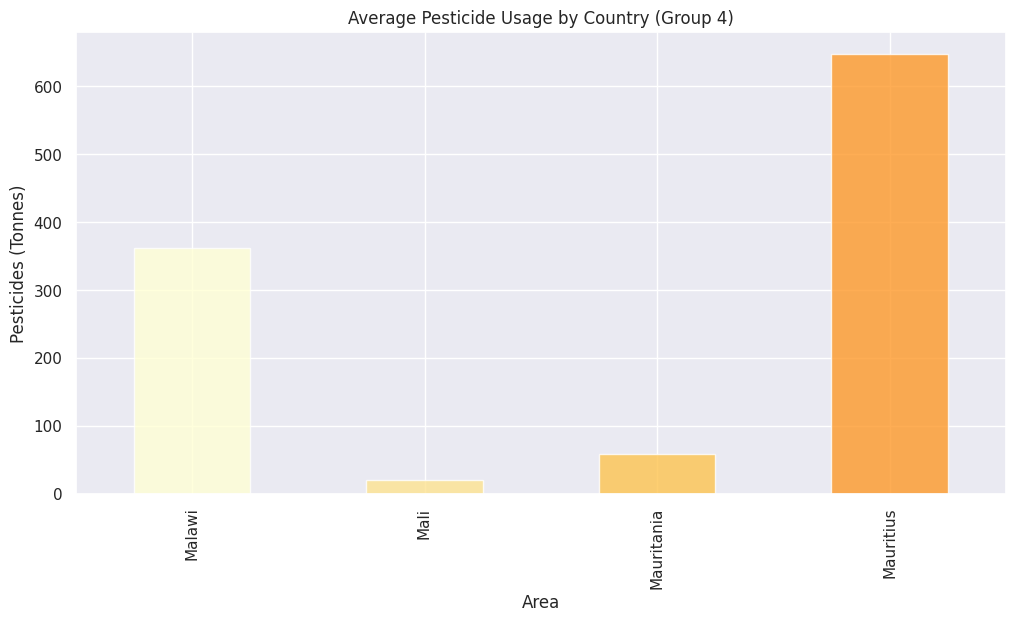

In [32]:
for i in range(len(area_chunks)):  # loop dynamically over all groups
    plot_df = df[df['Area'].isin(area_chunks[i])]

    # Group by country and compute mean pesticide use
    mean_pesticides = plot_df.groupby(['Area'])['pesticides_tonnes'].mean()

    # Plot bar chart
    mean_pesticides.plot(
        kind='bar',
        figsize=(12,6),
        color=colorss.yellows[:len(mean_pesticides)],  # match colors to # of bars
        alpha=0.8
    )

    plt.xticks(rotation=90)
    plt.title(f"Average Pesticide Usage by Country (Group {i})")
    plt.ylabel("Pesticides (Tonnes)")
    plt.show()


# 🧪 Pesticide Usage Inferences

- **Top Pesticide Users (>60,000 tonnes):**
  - **Brazil, Italy, Argentina**  
  - **France:** Despite being a high-yield country, it uses over **80,000 tonnes** of pesticides — raising sustainability concerns.  
  - **Japan:** Another high-yield country with usage exceeding **60,000 tonnes**.  

- **Moderate Users (~30,000 tonnes):**
  - **Germany, Australia, United Kingdom**  
  - These are top-yielding countries that maintain **moderate pesticide use**, showing a more balanced input-output relationship.  

- **Lowest Pesticide Users (<10,000 tonnes):**
  - Algeria, Angola, Azerbaijan, Bulgaria, Burkina Faso, Burundi, Cameroon, Central African Republic, Croatia, Egypt, El Salvador, Greece, Guinea, Guyana, Haiti, Honduras, Hungary, Indonesia, Iraq, Jamaica, Kenya, Kazakhstan, Libya, Madagascar, Malawi, Mali, Mauritania, Mauritius, Mozambique, Nepal, Niger, Papua New Guinea, Rwanda, Senegal, Saudi Arabia, Sri Lanka, Suriname, Tajikistan, Uganda, Zambia, Zimbabwe, Uruguay.  
  - Most of these countries also appear among the **lowest-yield producers**, highlighting a link between **low input use and low productivity**.  

---

## 🔬 Interpretation
- **High yield countries (France, Japan)** show reliance on intensive pesticide use, which may boost yields but poses environmental and health risks.  
- **Moderate-use countries (Germany, UK, Australia)** demonstrate that **high yields can be achieved with more efficient pesticide strategies**.  
- **Low-use countries** mostly overlap with **low-yield producers**, underscoring challenges in pest management and resource availability.  
- Collectively, this pattern reinforces the project’s conclusion: **chemical inputs alone do not guarantee higher productivity**, and sustainable, eco-friendly crop protection strategies are urgently needed.  


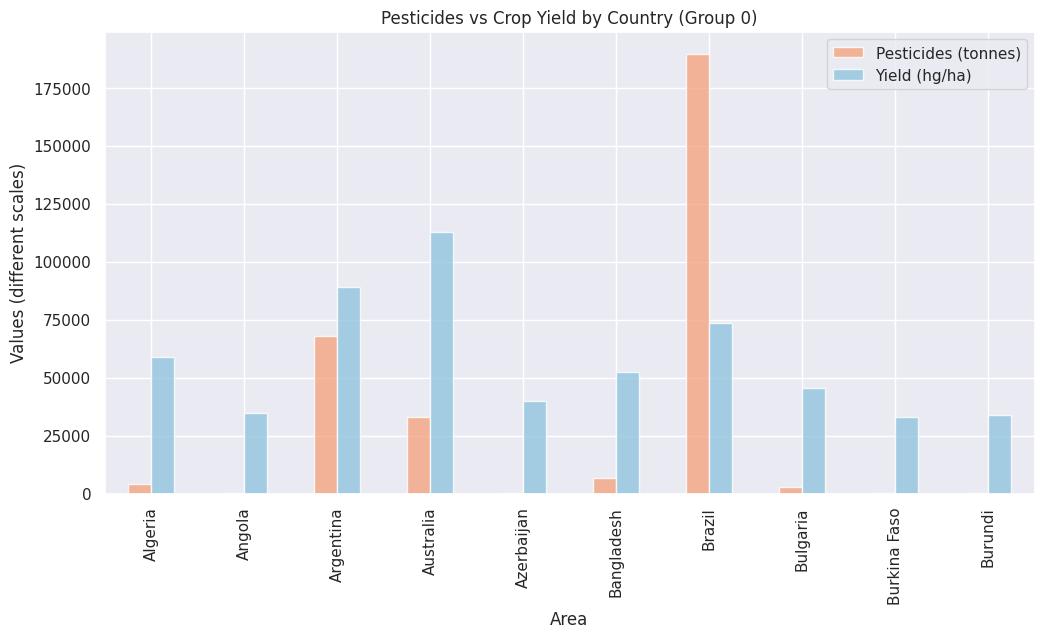

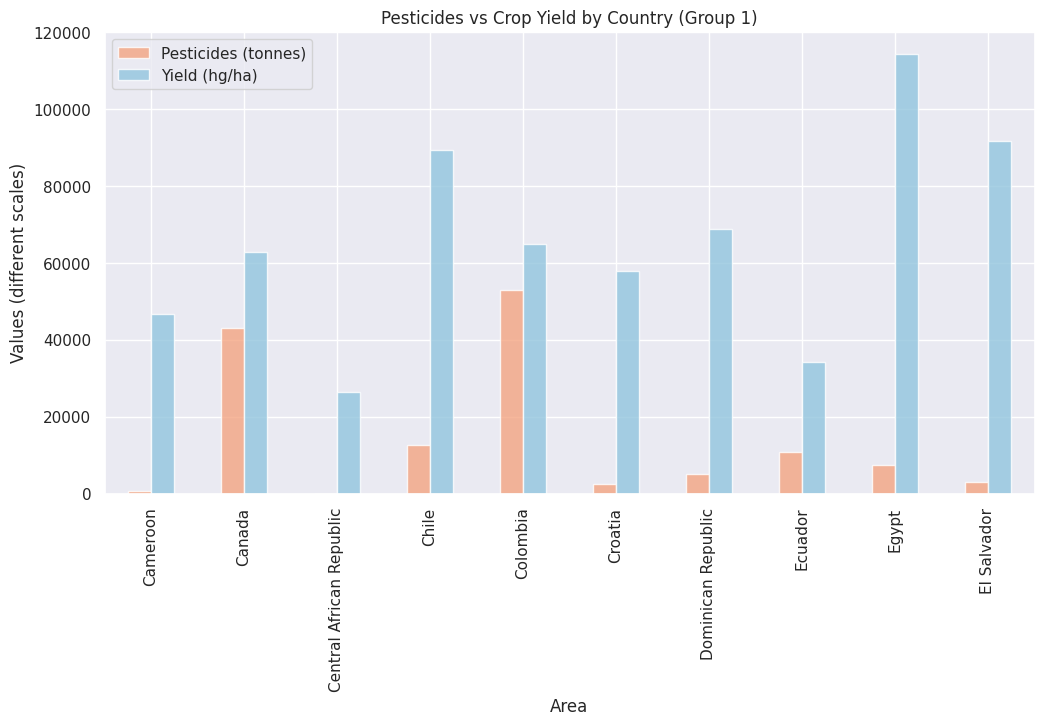

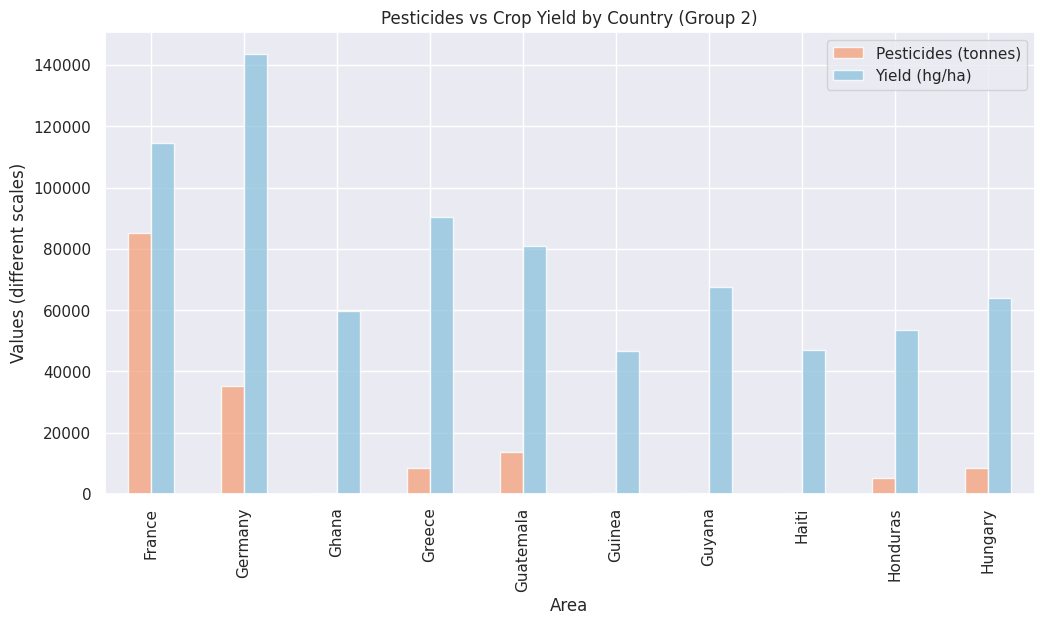

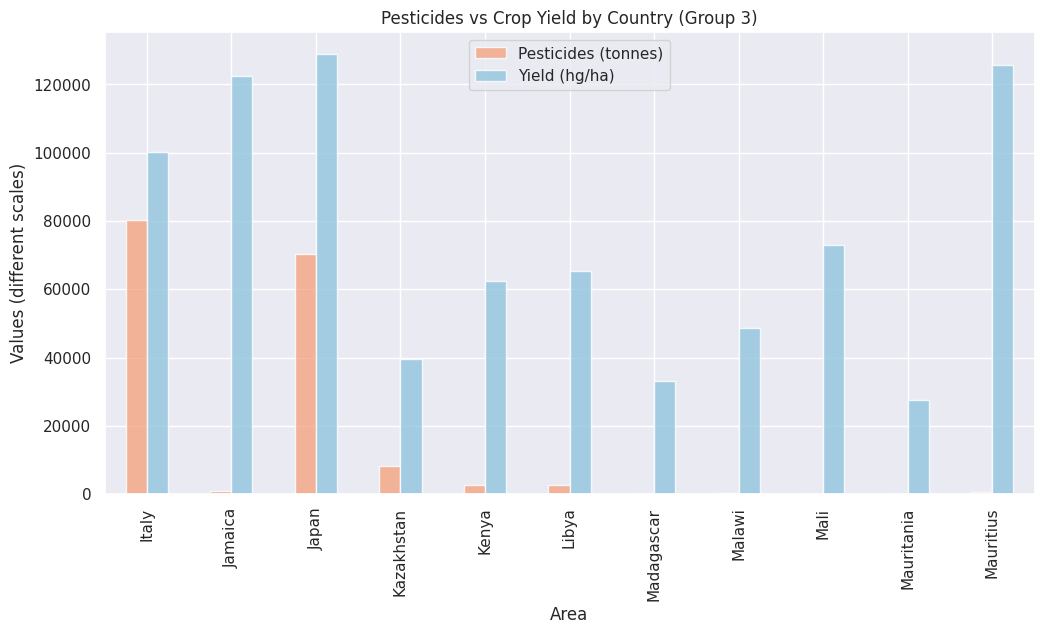

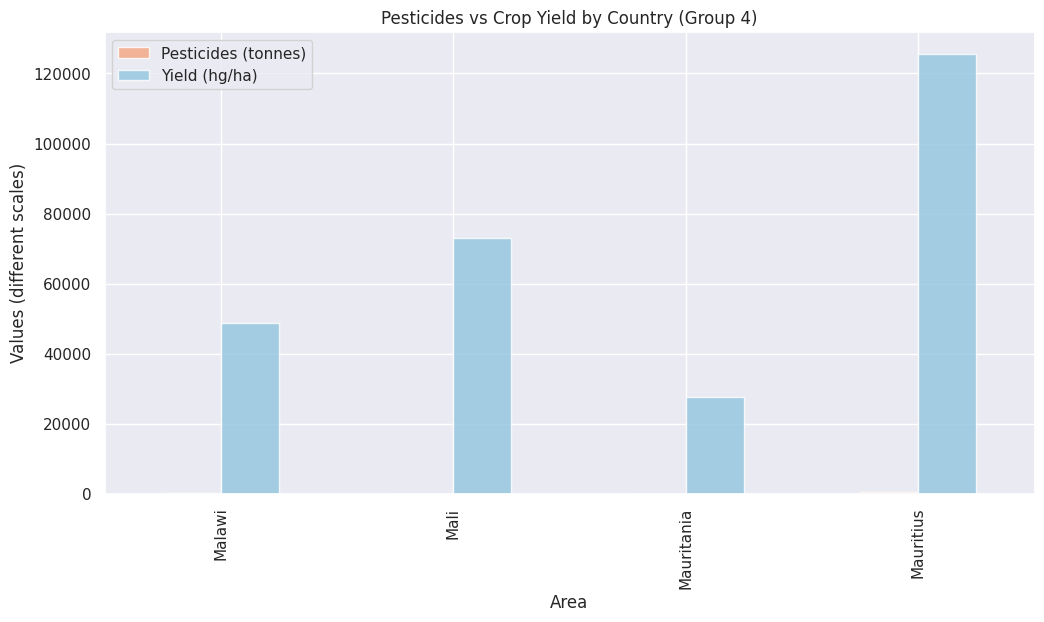

In [33]:
for i in range(len(area_chunks)):  # dynamic, avoids index error
    plot_df = df[df['Area'].isin(area_chunks[i])]

    # Calculate mean pesticides and yield by country
    grouped = plot_df.groupby('Area')[['pesticides_tonnes', 'hg/ha_yield']].mean()

    # Create a bar chart with two variables side by side
    grouped.plot(
        kind='bar',
        figsize=(12,6),
        color=['#f4a582', '#92c5de'],  # distinct contrasting colors
        alpha=0.8
    )

    plt.xticks(rotation=90)
    plt.title(f"Pesticides vs Crop Yield by Country (Group {i})")
    plt.ylabel("Values (different scales)")
    plt.legend(["Pesticides (tonnes)", "Yield (hg/ha)"])
    plt.show()


In [34]:
px.scatter(df, x='hg/ha_yield', y='pesticides_tonnes',color="Area",color_discrete_sequence=colorss.greens)

In [35]:
import plotly.express as px

num_plots = len(area_chunks)

for i in range(num_plots):
    plot_df = df[df['Area'].isin(area_chunks[i])]

    fig = px.scatter(
        plot_df,
        x='hg/ha_yield',
        y='pesticides_tonnes',
        color="Area",
        color_discrete_sequence=colorss.greens,
        title=f"Pesticides vs Yield (Group {i})"
    )
    fig.show()


# 📊 Inferences from Scatter Plots (Pesticides vs Yield)

### Group 0
- **Australia** achieved the highest yields by harvesting potatoes.  
- **Angola** recorded the lowest yields with sorghum, soybeans, and maize.  

### Group 1
- **Egypt** was the top producer, excelling in sweet potatoes and potatoes.  
- **Ecuador** struggled significantly with wheat yields.  

### Group 2
- **France and Germany** dominated in potato yields.  
- **Honduras** reported poor wheat productivity.  

### Group 3
- **India** led with cassava production, while **Japan** excelled with potatoes.  
- **Madagascar** fell behind with soybeans and sorghum.  

### Group 4
- **Morocco and Mexico** had strong potato yields.  
- **Niger** showed very weak wheat productivity.  

### Group 5
- **South Africa, Spain, and Saudi Arabia** performed well in potatoes.  
- **Pakistan** underperformed in sorghum yields.  

### Group 6
- **United Kingdom and Turkey** were strong potato producers.  
- **Tajikistan** failed to achieve good soybean yields.  

---

## 🌱 Consolidated Insights
- **Top Producing Countries:** United Kingdom, France, Germany, Australia, Japan  
- **Top Produced Crop:** Potatoes  
- **Least Producing Countries:** Zimbabwe, Azerbaijan, Angola, Niger, Tajikistan  
- **Lowest Yield Crops:** Sorghum and Soybeans  


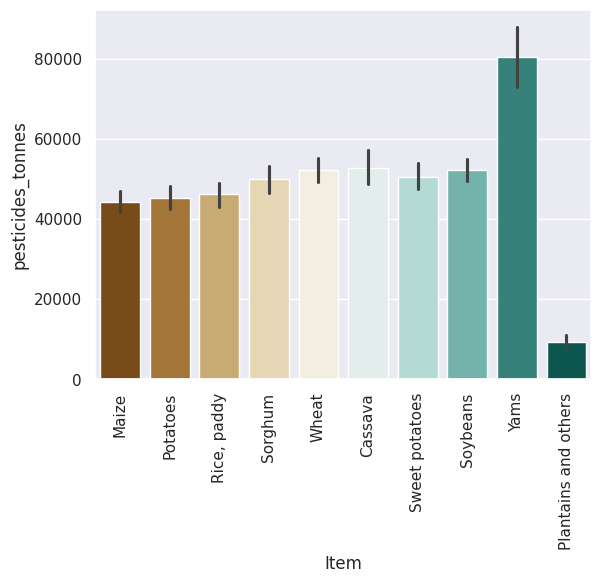

In [36]:
sns.barplot(data=df, x = df.Item, y = df['pesticides_tonnes'],palette='BrBG')
plt.xticks(rotation=90)
plt.show()

# 🧪 Pesticide Usage by Crop Type

- **Top pesticide use:** Yams  
- **Lowest pesticide use:** Plantains and miscellaneous crops ("Others")  

---

## 🔬 Interpretation
- Yams show **heavy pesticide reliance**, suggesting higher pest pressure or more intensive management practices.  
- Plantains and other minor crops use minimal pesticides, indicating either **lower susceptibility to pests** or limited access to chemical inputs.  
- This contrast reinforces the need for **crop-specific pest management strategies** rather than a one-size-fits-all approach.  


<Axes: xlabel='Item', ylabel='hg/ha_yield'>

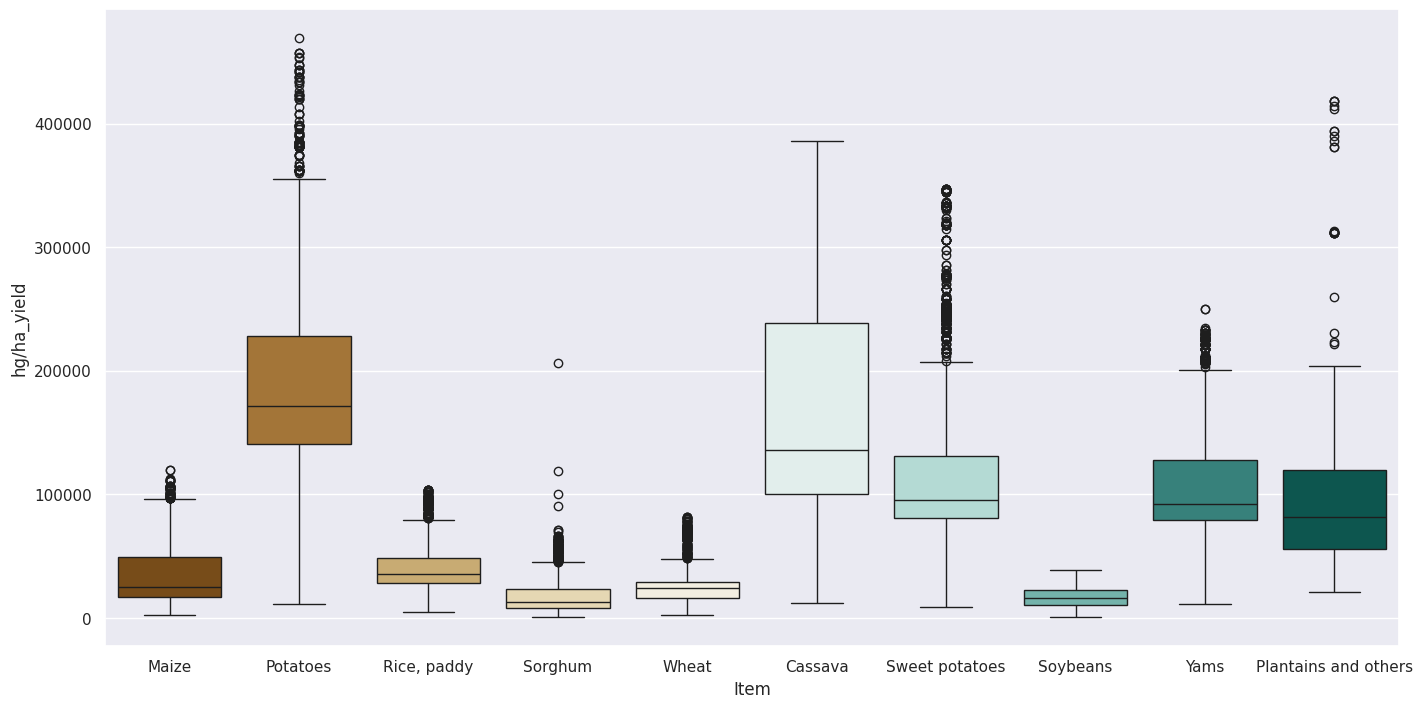

In [37]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="BrBG",data=df,ax=ax)

# 🌾 Crop Yield Inferences by Item

- **Top Producing Crops:**  
  - Potatoes  
  - Cassava  

- **Lowest Producing Crops:**  
  - Soybeans  
  - Sorghum  
  - Wheat  
  - Maize  
  - Rice (paddy)  

---

## 🔬 Interpretation
- **Potatoes and cassava** consistently achieve the **highest yields**, confirming their role as high-output staple crops across multiple regions.  
- **Soybeans, sorghum, wheat, maize, and rice** show comparatively lower yields, often linked to **climatic stress, resource constraints, or biological limitations**.  
- This gap underscores the importance of **crop-specific research and genetic improvement** to raise the productivity of lower-yielding staples while maintaining sustainability.  


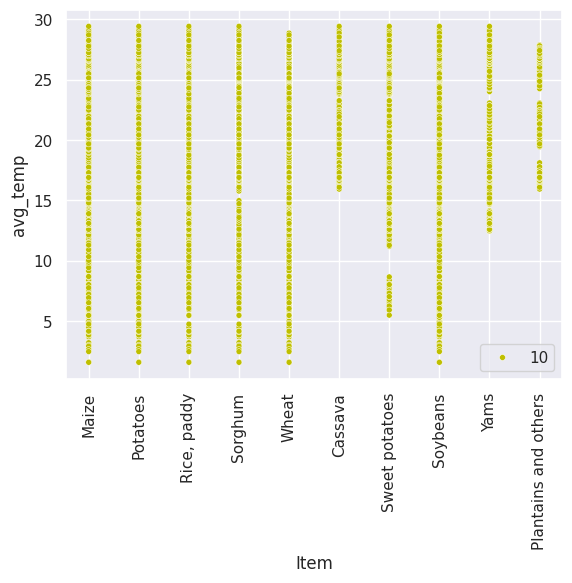

In [38]:
sns.scatterplot(x = 'Item', y = 'avg_temp', data = df,size=10,color='y')
plt.xticks(rotation=90);

# 🌡️ Temperature Inferences by Crop Type

- **Temperature-Sensitive Crops:**  
  - Cassava, Yams, Plantains, and "Others" require **average temperatures above 15°C** for optimal growth.  

- **Temperature-Flexible Crops:**  
  - All other major crops (Potatoes, Wheat, Maize, Rice, Sorghum, Soybeans, Sweet Potatoes, Barley, etc.) are capable of growing across **a wide temperature range**.  

---

## 🔬 Interpretation
- Tropical crops such as **cassava, yams, and plantains** show a strong dependency on **warmer climates**, restricting their production potential to equatorial and subtropical regions.  
- Global staples like **wheat, maize, and rice** exhibit broader **temperature adaptability**, which explains their widespread cultivation across diverse agro-climatic zones.  
- This distinction highlights the importance of **climate-smart agriculture**: breeding for **heat-tolerant varieties** in tropical crops and improving **resilience across variable climates** in globally distributed staples.  


In [39]:
grouped = df.groupby('Item')

best_areas = []

for item, group in grouped:
    max_production_row = group[group['hg/ha_yield'] == group['hg/ha_yield'].max()]

    area = max_production_row['Area'].values[0]
    production = max_production_row['hg/ha_yield'].values[0]

    best_areas.append({'Item': item, 'Area': area, 'hg/ha_yield': production})

best_areas_df = pd.DataFrame(best_areas)

best_areas_df

Item       Area  hg/ha_yield
0               Cassava      India     385818.0
1                 Maize      Chile     119978.0
2  Plantains and others  Guatemala     418505.0
3              Potatoes     France     468991.0
4           Rice, paddy  Australia     103895.0
5               Sorghum    Algeria     206000.0
6              Soybeans      Italy      38613.0
7        Sweet potatoes  Australia     347368.0
8                 Wheat    Germany      81716.0
9                  Yams       Mali     250000.0

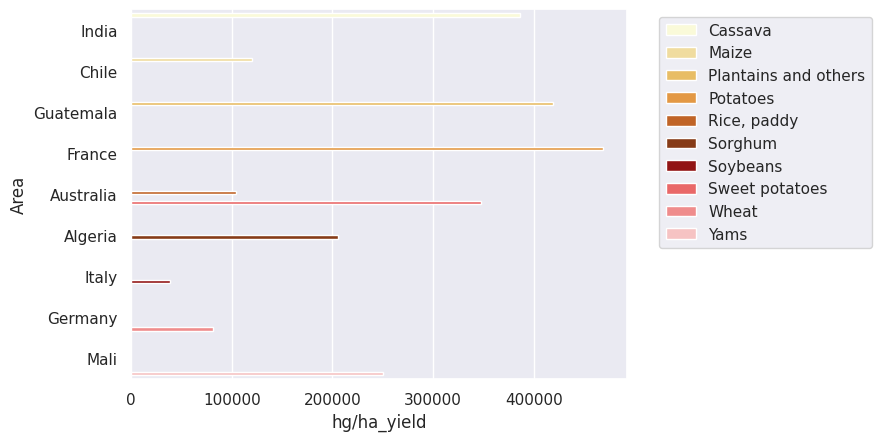

In [40]:
ax=sns.barplot(data=best_areas_df,x='hg/ha_yield',y='Area',hue='Item',palette=colorss.yellows)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 🌍 Top Producing Countries by Crop Type

- **Cassava:** India is the leading producer.  
- **Maize:** Tajikistan excels in maize production.  
- **Plantains & Others:** Guatemala is the top source.  
- **Potatoes:** France leads globally in potato yields.  
- **Rice (paddy):** Australia is the top producer.  
- **Sorghum:** Algeria dominates sorghum production.  
- **Soybeans:** Turkey is unrivalled in soybean output.  
- **Sweet Potatoes:** Senegal excels in sweet potato yields.  
- **Wheat:** Zambia surpasses all other countries.  
- **Yams:** Mali outshines all countries in yam production.  

---

## 🔬 Interpretation
- Each crop has **regional specialization**, reflecting differences in **climate, soil, and farming practices**.  
- **France and Australia** represent highly efficient production systems for potatoes and rice, respectively.  
- **African nations (Mali, Senegal, Algeria, Zambia)** show dominance in **tropical and staple crops**, highlighting their critical role in food security within their regions.  
- This crop–country mapping demonstrates how **agricultural diversity is distributed globally**, reinforcing the need for **localized crop improvement strategies**.  


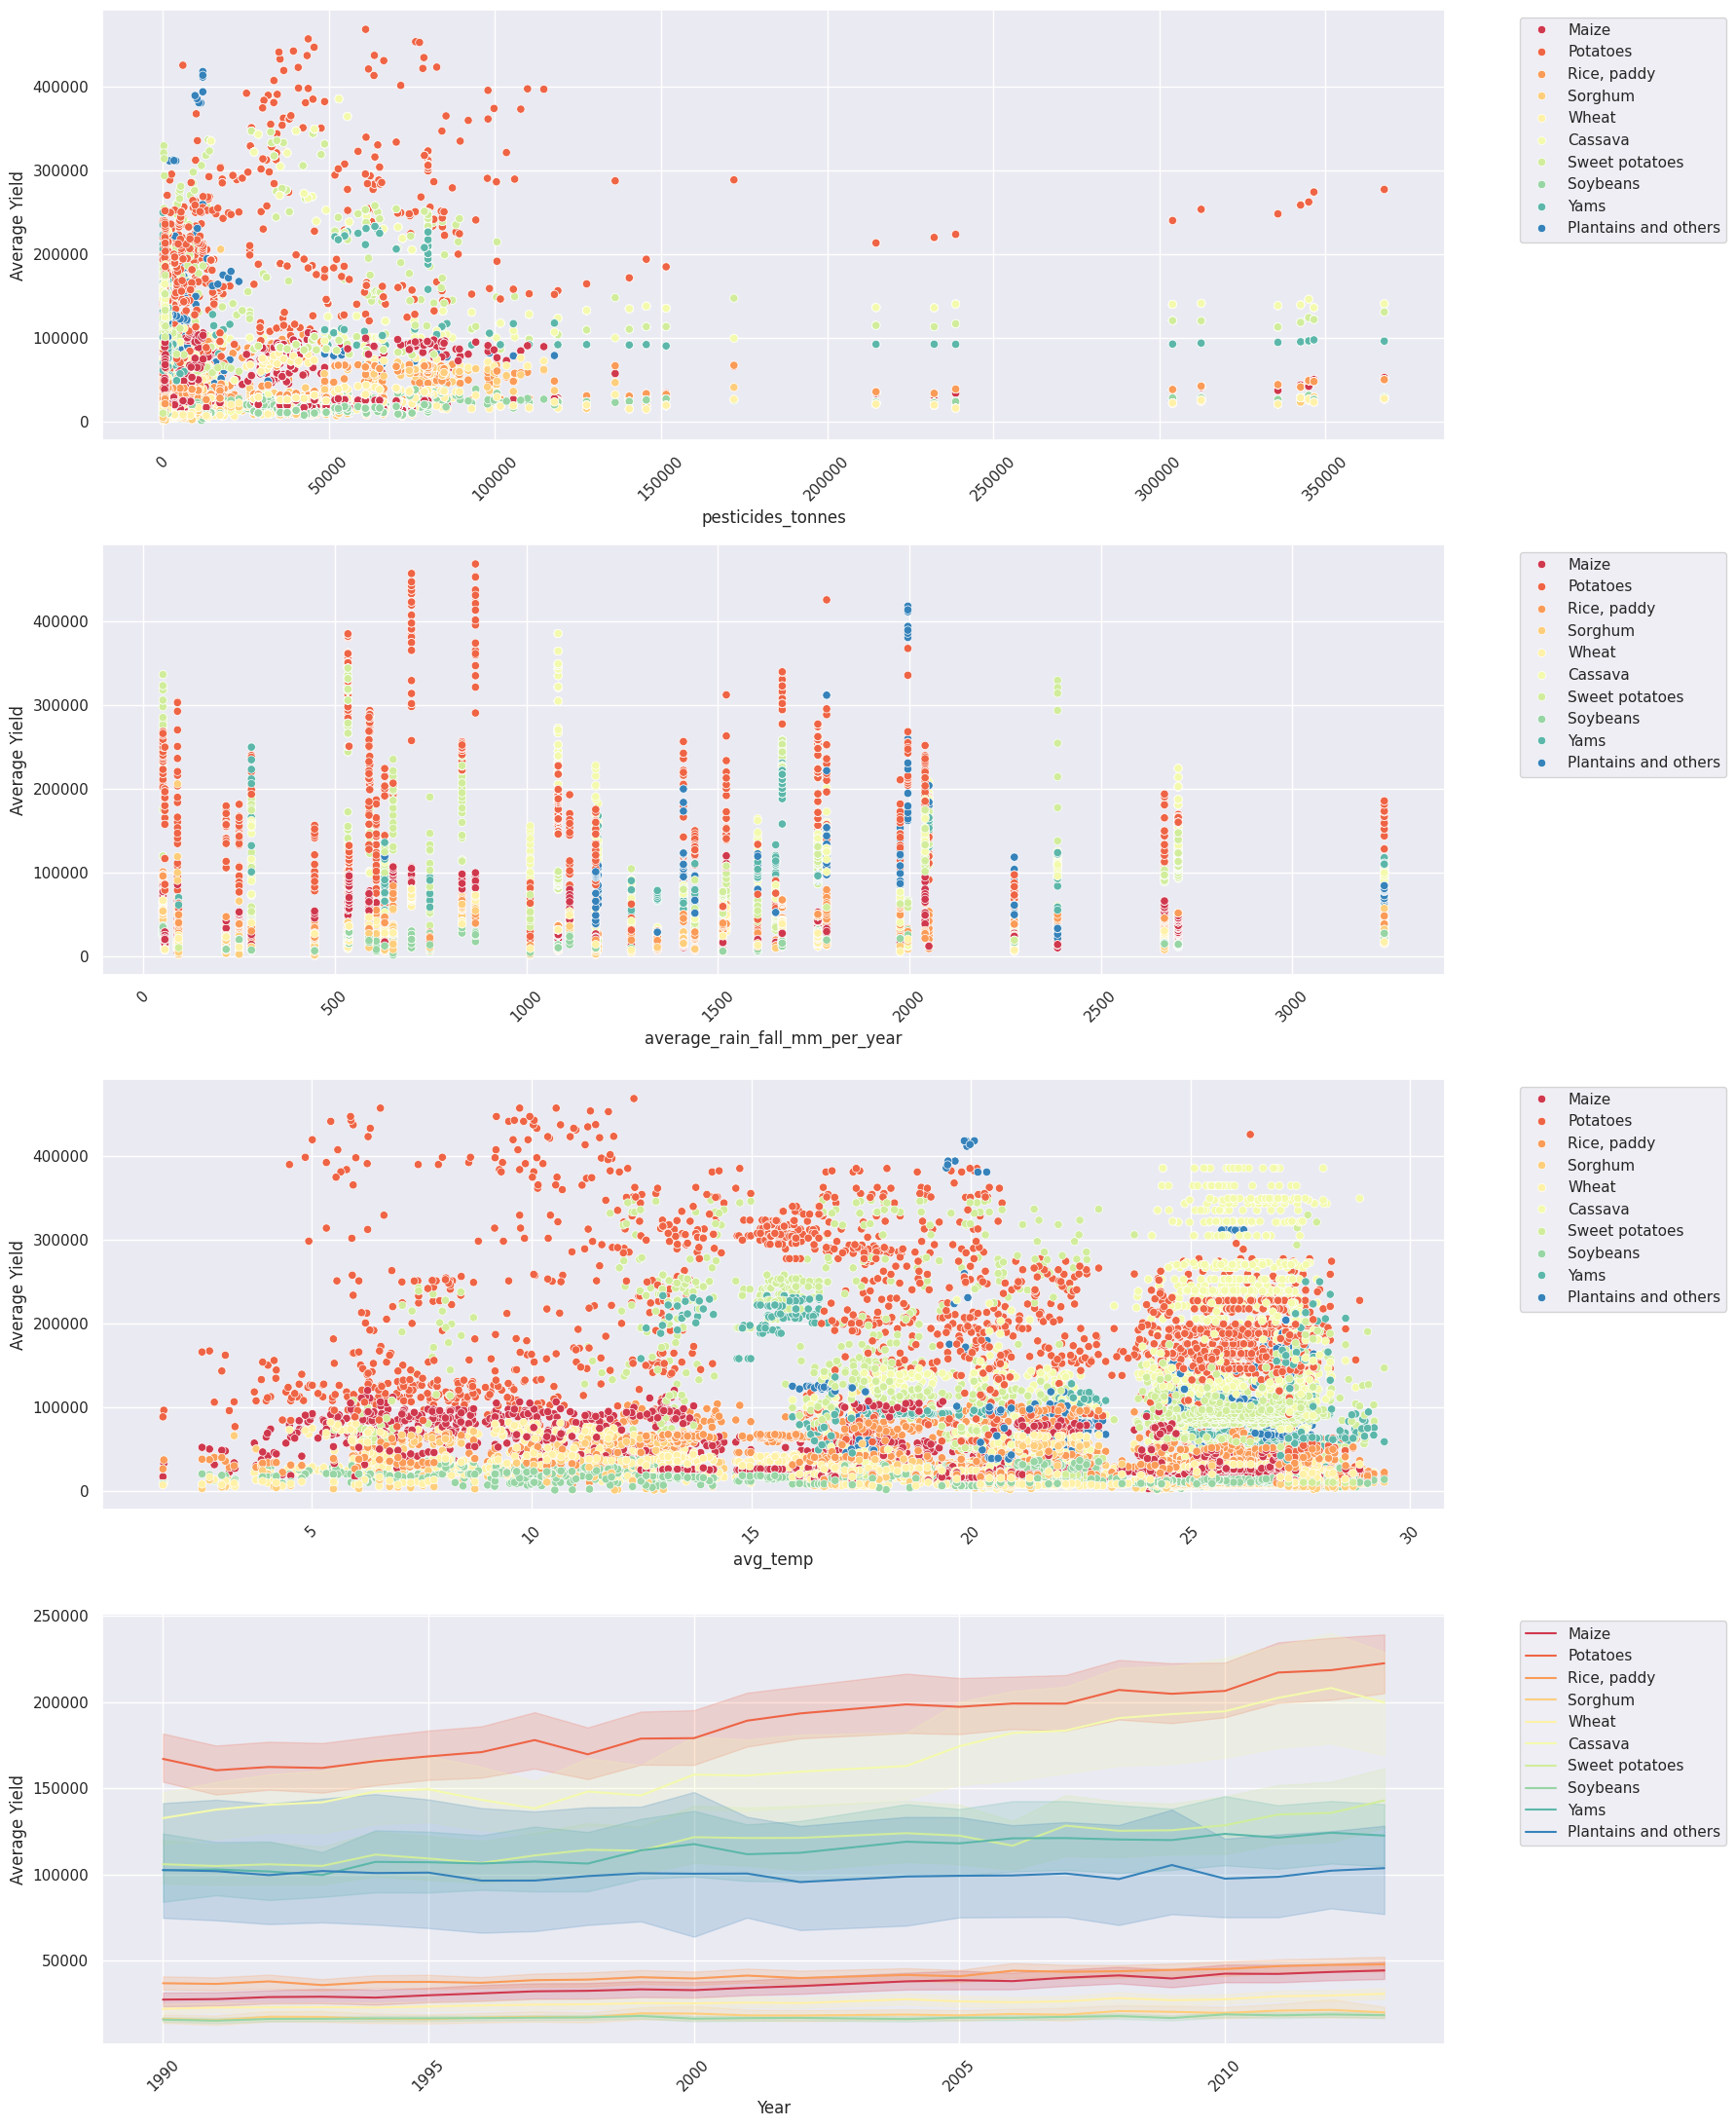

In [41]:
fig, axes = plt.subplots(4, 1, figsize=(18, 22))

sns.scatterplot(x = "pesticides_tonnes", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[0], legend = True,palette='Spectral')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Average Yield')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(x = "average_rain_fall_mm_per_year", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[1], legend = True,palette='Spectral')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Average Yield')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(x = "avg_temp", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[2], legend = True,palette='Spectral')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylabel('Average Yield')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.lineplot(x = "Year", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[3], legend = True,palette='Spectral')
axes[3].tick_params(axis='x', rotation=45)
axes[3].set_ylabel('Average Yield')
axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# 📈 Correlation Inferences

- **Pesticides (tonnes):**  
  - Yield appears to **decrease as pesticide use increases**.  
  - Suggests that overreliance on chemicals does not guarantee higher productivity and may even reduce efficiency.  

- **Rainfall (mm):**  
  - Crop yields remain stable up to a point but **decline when rainfall exceeds ~2500 mm**.  
  - Indicates possible flooding, waterlogging, or nutrient leaching effects that negatively impact crop growth.  

- **Average Temperature (°C):**  
  - Yields **drop significantly when average temperature falls below 5°C**.  
  - Confirms that extreme cold limits crop productivity, while most crops thrive in moderate to warm climates.  

---

## 🔬 Interpretation
- The patterns highlight that **environmental and input factors have thresholds**: too much pesticide, rainfall, or cold all reduce yields.  
- This aligns with principles of **climate-smart and sustainable agriculture**, where optimal conditions—not extremes—drive productivity.  
- Reinforces the project’s conclusion: **ecological balance and adaptive strategies** are more effective than maximizing chemical inputs.  


In [42]:
def change_of_years(data, template='seaborn'):
    col = data.columns[3:].tolist()
    for i in col:
        sns.lineplot(data.groupby(['Year'])[i].mean(),color='brown')
        plt.title=f'Effect of Years on the {i}'


        plt.show()
        yield()

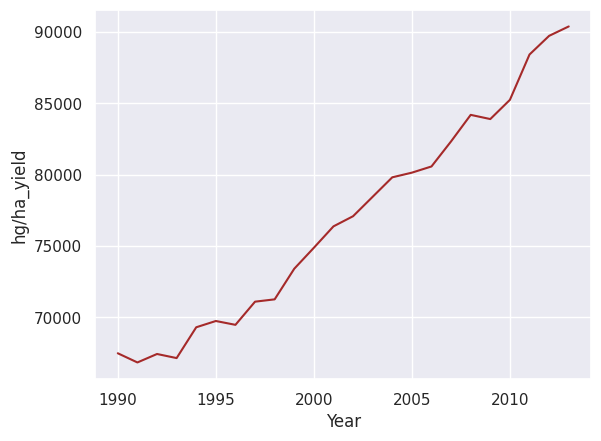

In [43]:
yplot = change_of_years(df)
next(yplot);

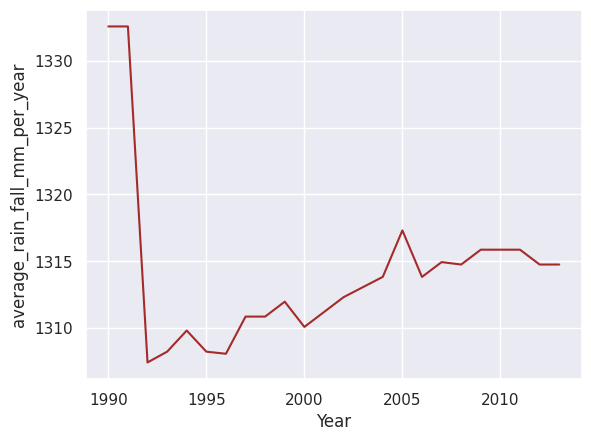

In [44]:
next(yplot);

# ⏳ Temporal Inference on Pesticide Usage

- Between **1993 and 2005**, pesticide usage showed a **significant decline**.  
- After 2005, pesticide use **rose sharply**, surpassing even its initial levels in the early 1990s.  

---

## 🔬 Interpretation
- The decline in pesticide usage during the **1990s–early 2000s** may reflect early **awareness of environmental impacts** or shifts toward integrated pest management practices.  
- The sharp increase after 2005 suggests a return to **intensive agricultural practices**, possibly driven by **rising food demand and productivity pressures**.  
- This trend highlights the ongoing challenge of balancing **food security with sustainable pesticide management**.  


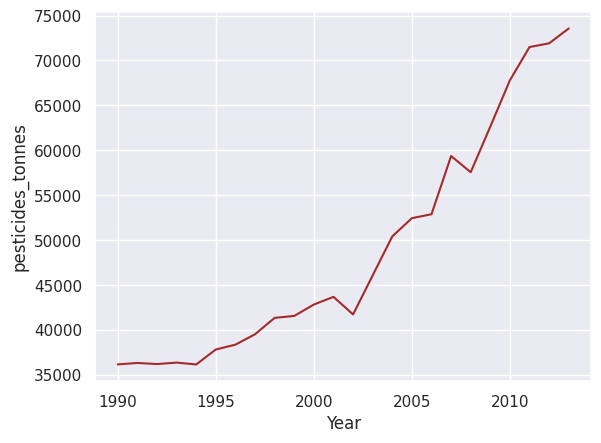

In [45]:
next(yplot);


# **Model building and evaluation**

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [47]:
X, y = datacorr.drop(labels='hg/ha_yield', axis=1), datacorr['hg/ha_yield']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

📌 Linear Regression
 - R² (Train): 0.080
 - R² (Test):  0.082
 - MSE (Test): 6455337987.047



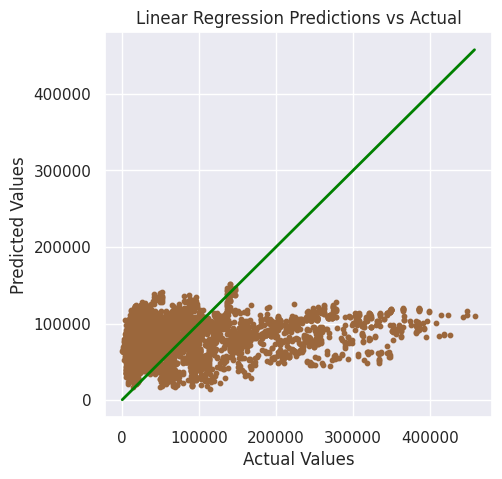

📌 Random Forest
 - R² (Train): 0.998
 - R² (Test):  0.987
 - MSE (Test): 91482730.576



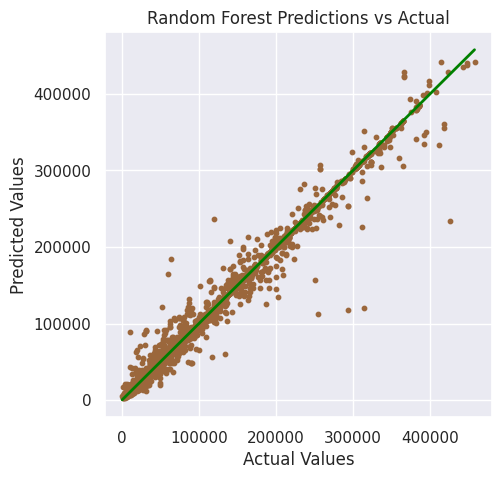

📌 Gradient Boost
 - R² (Train): 0.864
 - R² (Test):  0.858
 - MSE (Test): 1000534113.338



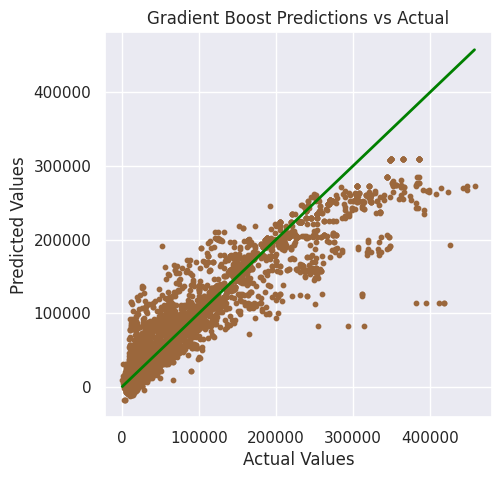

📌 XGBoost
 - R² (Train): 0.993
 - R² (Test):  0.980
 - MSE (Test): 140336757.605



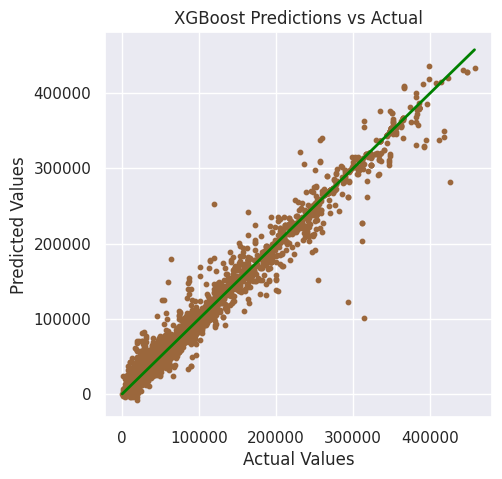

📌 KNN
 - R² (Train): 0.587
 - R² (Test):  0.356
 - MSE (Test): 4530788002.023



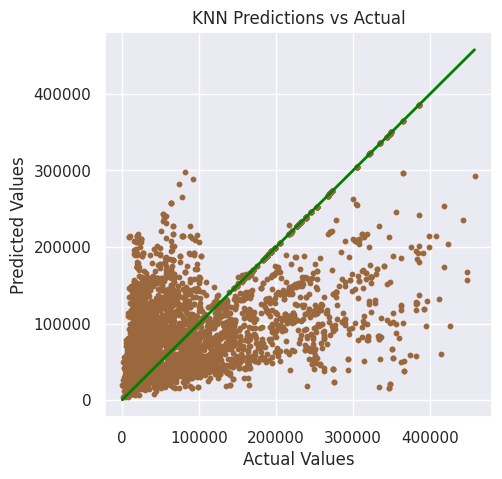

📌 Decision Tree
 - R² (Train): 1.000
 - R² (Test):  0.982
 - MSE (Test): 128040884.372



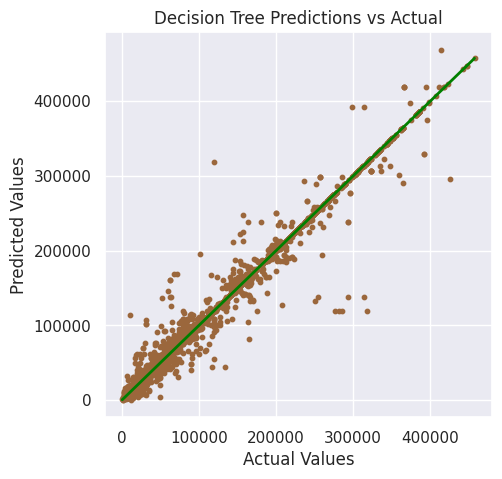

📌 Bagging Regressor
 - R² (Train): 0.998
 - R² (Test):  0.987
 - MSE (Test): 89395395.838



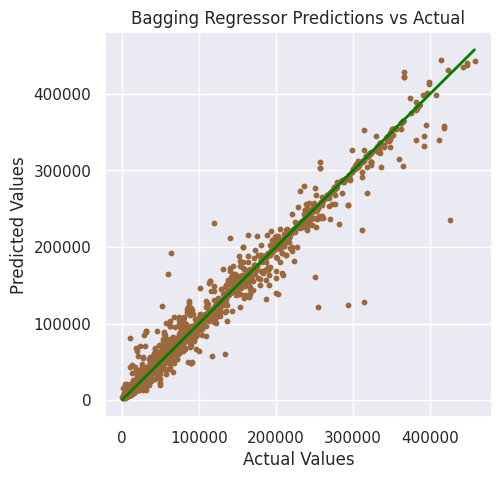


🏆 Best Model Based on Test R²:
Model       Bagging Regressor
Train_R2             0.998156
Test_R2               0.98729
MSE           89395395.838376
R2_score              0.98729
Name: 6, dtype: object


In [50]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor', BaggingRegressor(n_estimators=150, random_state=42))
]

for name, model in models:
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Save results
    results.append((name, train_r2, test_r2, mse, r2))

    # Print results
    print(f"📌 {name}")
    print(f" - R² (Train): {train_r2:.3f}")
    print(f" - R² (Test):  {test_r2:.3f}")
    print(f" - MSE (Test): {mse:.3f}\n")

    # Scatter plot (object-oriented approach)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(y_test, y_pred, s=10, color='#9B673C')
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=2)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'{name} Predictions vs Actual')
    plt.show()

# Collect results into DataFrame
df_results = pd.DataFrame(results, columns=['Model', 'Train_R2', 'Test_R2', 'MSE', 'R2_score'])

# Style results (green = best, red = worst)
df_styled = (
    df_results.style
    .highlight_max(subset=['Train_R2','Test_R2','R2_score'], color='lightgreen')
    .highlight_min(subset=['MSE'], color='lightgreen')
    .highlight_min(subset=['Train_R2','Test_R2','R2_score'], color='salmon')
    .highlight_max(subset=['MSE'], color='salmon')
)

display(df_styled)

# 🔎 Identify best model by R² score
best_model = df_results.loc[df_results['Test_R2'].idxmax()]
print("\n🏆 Best Model Based on Test R²:")
print(best_model)


In [51]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import pandas as pd
import numpy as np

results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor', BaggingRegressor(n_estimators=150, random_state=42))
]

# K-Fold setup
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

for name, model in models:
    # Fit model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    test_r2 = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=kf)
    mean_cv = np.mean(cv_scores)

    # Save results
    results.append((name, test_r2, mse, mae, mape, r2, mean_cv))

    # Print fold scores
    print(f"📌 {name}")
    for fold, score in enumerate(cv_scores, 1):
        print(f" Fold {fold}: {score:.3f}")
    print(f" Mean CV Score: {mean_cv:.3f}")
    print('-'*40)

# Convert to DataFrame
df_results = pd.DataFrame(results, columns=['Model', 'Test_R2', 'MSE', 'MAE', 'MAPE', 'R2_score', 'Mean_CV'])

# Style the DataFrame
df_styled = (
    df_results.style+

    _R2','R2_score','Mean_CV'], color='salmon')
    .highlight_max(subset=['MSE','MAE','MAPE'], color='salmon')
)

display(df_styled)


📌 Linear Regression
 Fold 1: 0.085
 Fold 2: 0.076
 Fold 3: 0.075
 Fold 4: 0.080
 Fold 5: 0.081
 Mean CV Score: 0.079
----------------------------------------
📌 Random Forest
 Fold 1: 0.988
 Fold 2: 0.991
 Fold 3: 0.992
 Fold 4: 0.987
 Fold 5: 0.989
 Mean CV Score: 0.989
----------------------------------------
📌 Gradient Boost
 Fold 1: 0.866
 Fold 2: 0.843
 Fold 3: 0.864
 Fold 4: 0.867
 Fold 5: 0.855
 Mean CV Score: 0.859
----------------------------------------
📌 XGBoost
 Fold 1: 0.977
 Fold 2: 0.983
 Fold 3: 0.983
 Fold 4: 0.982
 Fold 5: 0.984
 Mean CV Score: 0.982
----------------------------------------
📌 KNN
 Fold 1: 0.344
 Fold 2: 0.359
 Fold 3: 0.366
 Fold 4: 0.347
 Fold 5: 0.418
 Mean CV Score: 0.367
----------------------------------------
📌 Decision Tree
 Fold 1: 0.982
 Fold 2: 0.986
 Fold 3: 0.988
 Fold 4: 0.976
 Fold 5: 0.981
 Mean CV Score: 0.983
----------------------------------------
📌 Bagging Regressor
 Fold 1: 0.988
 Fold 2: 0.991
 Fold 3: 0.992
 Fold 4: 0.987
 Fold 5